<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание" data-toc-modified-id="Описание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-даннах" data-toc-modified-id="Анализ-даннах-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ даннах</a></span><ul class="toc-item"><li><span><a href="#Причины-роста-cpa" data-toc-modified-id="Причины-роста-cpa-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Причины роста cpa</a></span></li><li><span><a href="#Распределение-затрат-по-клиентам" data-toc-modified-id="Распределение-затрат-по-клиентам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Распределение затрат по клиентам</a></span></li><li><span><a href="#Распределение-затрат-Сигма-по-категориям" data-toc-modified-id="Распределение-затрат-Сигма-по-категориям-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Распределение затрат Сигма по категориям</a></span></li><li><span><a href="#Распределение-затрат-Сигма-по-девайсам" data-toc-modified-id="Распределение-затрат-Сигма-по-девайсам-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Распределение затрат Сигма по девайсам</a></span></li><li><span><a href="#Распределение-затрат-Сигма-по-месту" data-toc-modified-id="Распределение-затрат-Сигма-по-месту-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Распределение затрат Сигма по месту</a></span></li><li><span><a href="#Распределение-затрат-Сигма-по-типу-баннера" data-toc-modified-id="Распределение-затрат-Сигма-по-типу-баннера-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Распределение затрат Сигма по типу баннера</a></span></li><li><span><a href="#Распределение-затрат-Сигма-по-типу-запроса" data-toc-modified-id="Распределение-затрат-Сигма-по-типу-запроса-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Распределение затрат Сигма по типу запроса</a></span></li><li><span><a href="#Распределение-затрат-Сигма-по-типу-таргетинга" data-toc-modified-id="Распределение-затрат-Сигма-по-типу-таргетинга-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Распределение затрат Сигма по типу таргетинга</a></span></li><li><span><a href="#Многофакторное-ранжирование-cpa" data-toc-modified-id="Многофакторное-ранжирование-cpa-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Многофакторное ранжирование cpa</a></span></li></ul></li><li><span><a href="#Общий-вывод." data-toc-modified-id="Общий-вывод.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод.</a></span></li></ul></div>

# Поиск причин роста расходов в рекламе

Презентация <https://cloud.mail.ru/public/hvCP/ocCDUY1bi>

## Описание

Рекламодатель Сигма жалуется на постоянный рост CPA по своим рекламным кампаниям в последние 4 месяца (с июня по сент 2022). Задача проанализировать его размещение с целями:
1) Выяснить причину растущего CPA
2) Дать рекомендации по снижению и стабилизации CPA до целевого значения (380 руб)

## Подготовка данных

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [100]:
data = pd.read_excel('data.xlsx')

In [101]:
data


,Client,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost,Conversions
0,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Phrase,0,0,0.000000,0
1,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,5949,41,1666.844364,0
2,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,cpc_video,none,Retargeting,191,6,40.641915,0
3,Гамма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,227,1,45.747407,0
4,Гамма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,18,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10473,Псилон,2022-09-01,ВКЛАДЫ,Desktop,Search,text,Brand,Phrase,1611,658,13302.665008,5
10474,Псилон,2022-09-01,ВКЛАДЫ,Desktop,Search,text,Other,Phrase,1,0,0.000000,0
10475,Псилон,2022-09-01,ВКЛАДЫ,Mobile,Search,text,Brand,Phrase,3536,1634,10213.208517,7
10476,Псилон,2022-09-01,ВКЛАДЫ,Mobile,Search,text,Other,Phrase,8,3,21.095415,0


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10478 entries, 0 to 10477
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Client                   10478 non-null  object        
 1   Month                    10478 non-null  datetime64[ns]
 2   Category                 10478 non-null  object        
 3   Device                   10478 non-null  object        
 4   Place                    10478 non-null  object        
 5   BannerType               10478 non-null  object        
 6   QueryType (search only)  10478 non-null  object        
 7   TargetingType            10478 non-null  object        
 8   Shows                    10478 non-null  int64         
 9   Clicks                   10478 non-null  int64         
 10  Cost                     10478 non-null  float64       
 11  Conversions              10478 non-null  int64         
dtypes: datetime64[ns](1), float64(1)

In [103]:
data.columns = data.columns.str.lower()
data.columns

Index(['client', 'month', 'category', 'device', 'place', 'bannertype',
       'querytype (search only)', 'targetingtype', 'shows', 'clicks', 'cost',
       'conversions'],
      dtype='object')

In [104]:
data.isna().sum()

client                     0
month                      0
category                   0
device                     0
place                      0
bannertype                 0
querytype (search only)    0
targetingtype              0
shows                      0
clicks                     0
cost                       0
conversions                0
dtype: int64

In [105]:
data.duplicated().sum()

0

Проверим сколько категорий представлено

In [106]:
data['category'].unique()

array(['РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ', 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ',
       'КРЕДИТНЫЕ КАРТЫ', 'ИПОТЕЧНОЕ КРЕДИТОВАНИЕ', 'ИНВЕСТИЦИИ',
       'ДЕБЕТОВЫЕ КАРТЫ', 'ВКЛАДЫ'], dtype=object)

Проверим сколько типов баннеров представлено

In [107]:
data['bannertype'].unique()

array(['cpc_video', 'image_ad', 'mcbanner', 'text', 'cpm_banner',
       'performance', 'dynamic'], dtype=object)

Проверим сколько мест представлено

In [108]:
data['place'].unique()

array(['Networks', 'Search'], dtype=object)

Проверим сколько типов таргетинга представлено

In [109]:
data['targetingtype'].unique()

array(['Phrase', 'Retargeting', 'Autotargeting'], dtype=object)

## Анализ даннах

Составим функцию для выводов под графиками.

In [110]:
def conclusion(data):
    data=data.tail(4)
    print('Распределение затрат в пределах 380 рублей:')
    flag = True
    for column in data:
        if max(data[column])<380 and max(data[column])!=0:   
            flag = False
            print(f' * {column} - от {min(data[column])} до {max(data[column])}')
    
    if flag:
        print('Нет')
    print()
    print('Распределение затрат более 380 рублей:')
    
    flag = True
    for column in data:
        if max(data[column])>380 and max(data[column])!=0:
            flag = False
            print(f' * {column} - от {min(data[column])} до {max(data[column])}')
            
    if flag:
        print('Нет')

Подготовим данные по клиентам по месяцам, стоимости рекламы и целевых действий.
Посчитаем Стоимость за дествие показатель cpa, добавив новую колонку.

In [111]:
cost_conversion = data.groupby(['client', 'month']).agg({'cost':sum, 'conversions':sum})
cost_conversion['cpa']=cost_conversion['cost']/cost_conversion['conversions']
cost_conversion

cost  conversions          cpa
client month                                             
Альфа  2021-04-01  1.404487e+07         2322  6048.608137
       2021-05-01  1.393393e+07         6586  2115.689477
       2021-06-01  1.601188e+07        10602  1510.269312
       2021-07-01  1.346491e+07        11021  1221.750086
       2021-08-01  1.622199e+07        12158  1334.264782
...                         ...          ...          ...
Сигма  2022-05-01  8.186205e+06        36497   224.298015
       2022-06-01  2.462878e+07        61114   402.997279
       2022-07-01  2.790863e+07        67365   414.289792
       2022-08-01  2.739342e+07        59279   462.110071
       2022-09-01  1.174660e+07        19326   607.813154

[180 rows x 3 columns]

Посмотрим на клиента Сигма

In [112]:
cost_conversion_sigma=cost_conversion.loc['Сигма']
cost_conversion_sigma

,cost,conversions,cpa
month,,,
2021-04-01,1.879835e+07,57281,328.177804
2021-05-01,1.926166e+07,36194,532.178290
2021-06-01,1.976366e+07,22712,870.185769
2021-07-01,2.281707e+07,43744,521.604655
2021-08-01,2.679524e+07,67391,397.608533
2021-09-01,2.554050e+07,66273,385.383168
2021-10-01,2.783248e+07,59535,467.497798
2021-11-01,2.229152e+07,55714,400.106179
2021-12-01,2.435009e+07,51795,470.124307


Посмотрим на график CPA по месяцам

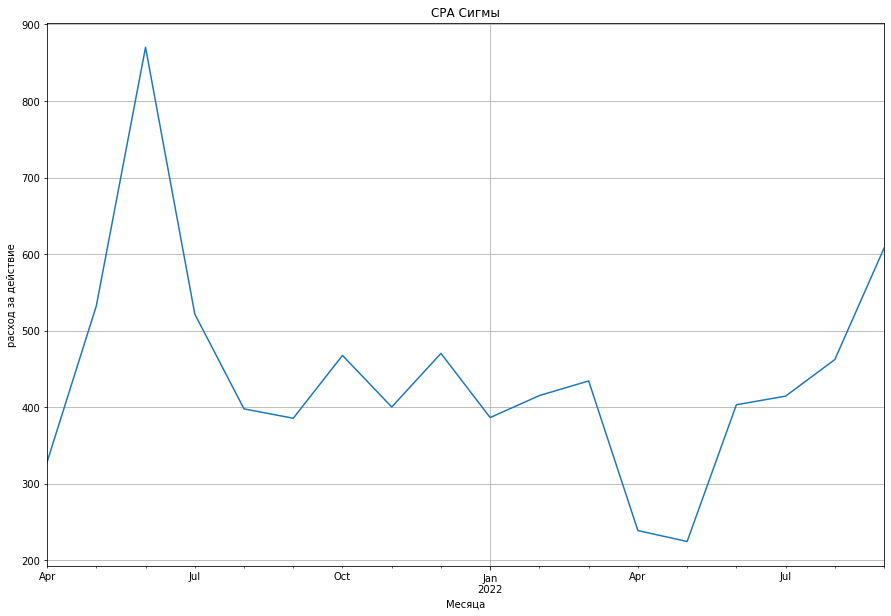

In [113]:
cost_conversion_sigma['cpa'].plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='СРА Сигмы', grid=True)
plt.show()

Мы видим, что цена до апреля падала, потом после апреля она начала подниматься, так же мы видим поднятие цен в прошлом году. Можно предположить ,что это сезонность, и в апреле стоимость на рекламу возрастают.

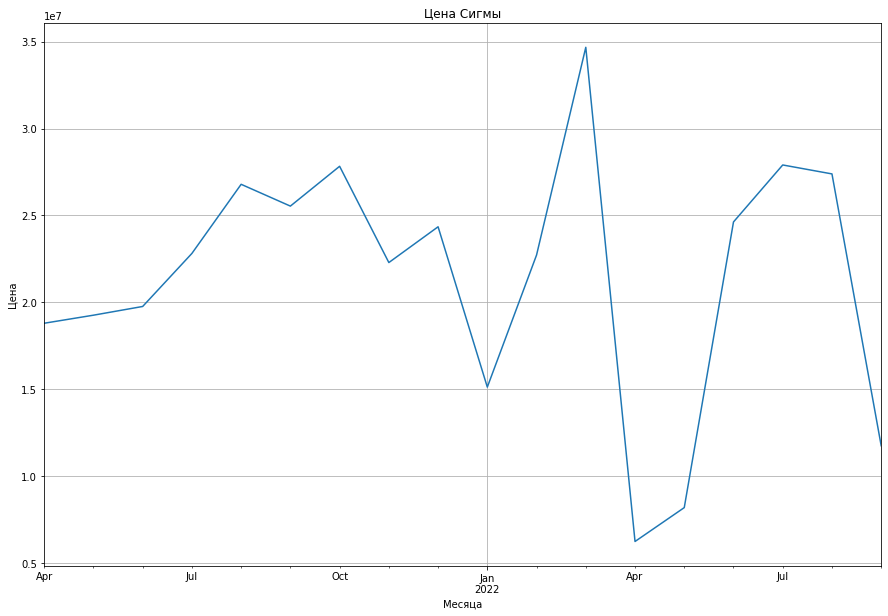

In [114]:
cost_conversion_sigma['cost'].plot(figsize = (15, 10), xlabel='Месяца', ylabel='Цена', title='Цена Сигмы', grid=True)
plt.show()

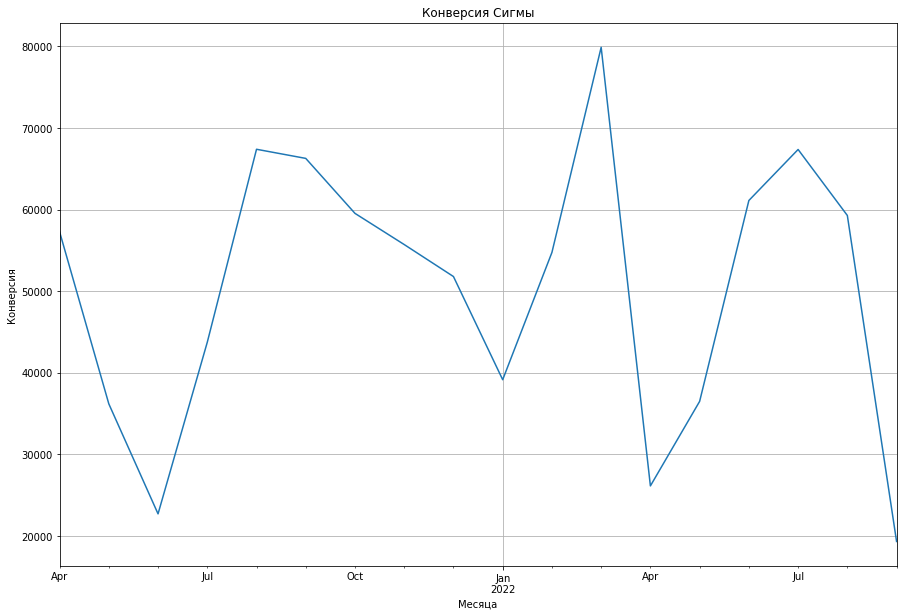

In [115]:
cost_conversion_sigma['conversions'].plot(figsize = (15, 10), xlabel='Месяца', ylabel='Конверсия', title='Конверсия Сигмы', grid=True)
plt.show()

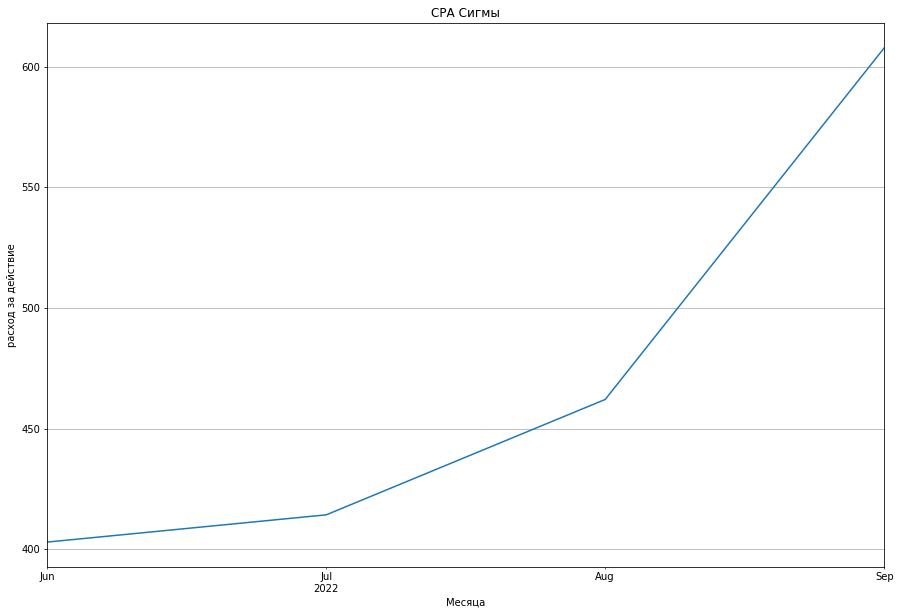

In [116]:
cost_conversion_sigma['cpa'].tail(4).plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='СРА Сигмы', grid=True)
plt.show()

С июня по сентябрь 2022 года СРА выросло с 402 до 607.

Посчитаем общее среднее за весь период

In [117]:
cost_conversion_sigma['cpa'].mean()


442.1332017776464

Посчитаем среднее за четырех месячный период

In [118]:
cost_conversion_sigma['cpa'].tail(4).mean()

471.80257394068883

### Причины роста cpa

In [119]:
sigma_df = data[(data['client'] == 'Сигма') & (data['month'] >= '2022-02-01')]
sigma_df['period_label']= data['month'] >= '2022-06-01'
sigma_df

E:\Apps\anacondas\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,client,month,category,device,place,bannertype,querytype (search only),targetingtype,shows,clicks,cost,conversions,period_label
1006,Сигма,2022-02-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Phrase,1849751,4590,4.938561e+04,7,False
1007,Сигма,2022-02-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,472834,556,2.653113e+04,2,False
1008,Сигма,2022-02-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Phrase,898092,9724,5.246173e+04,11,False
1009,Сигма,2022-02-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,356067,2741,3.731894e+04,4,False
1054,Сигма,2022-02-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,text,none,Phrase,78295072,74346,1.788177e+06,369,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10442,Сигма,2022-09-01,ВКЛАДЫ,Mobile,Networks,text,none,Phrase,399500,7921,5.913351e+04,232,True
10443,Сигма,2022-09-01,ВКЛАДЫ,Mobile,Networks,text,none,Retargeting,47139,1132,4.998837e+03,31,True
10444,Сигма,2022-09-01,ВКЛАДЫ,Mobile,Search,text,Brand,Phrase,10590,2991,1.740449e+04,74,True
10445,Сигма,2022-09-01,ВКЛАДЫ,Mobile,Search,text,Competitor,Phrase,0,0,0.000000e+00,0,True


In [120]:
sigma_new = sigma_df.groupby(['period_label','category','device', 'place', 'bannertype','querytype (search only)', 'targetingtype']).agg({'cost':sum, 'conversions':sum})
sigma_new['cpa'] = sigma_new['cost'] / sigma_new['conversions'].apply(lambda x: max(x,1))
sigma_new = sigma_new.reset_index()


In [121]:
sigma_new

,period_label,category,device,place,bannertype,querytype (search only),targetingtype,cost,conversions,cpa
0,False,ВКЛАДЫ,Desktop,Networks,text,none,Phrase,6.438975e+05,8504,75.717013
1,False,ВКЛАДЫ,Desktop,Networks,text,none,Retargeting,1.279911e+05,2309,55.431384
2,False,ВКЛАДЫ,Desktop,Search,text,Brand,Phrase,1.618679e+05,771,209.945441
3,False,ВКЛАДЫ,Desktop,Search,text,Competitor,Phrase,0.000000e+00,0,0.000000
4,False,ВКЛАДЫ,Desktop,Search,text,Other,Phrase,1.391591e+01,0,13.915907
...,...,...,...,...,...,...,...,...,...,...
191,True,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Search,mcbanner,Competitor,Phrase,8.796082e+02,0,879.608212
192,True,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Search,mcbanner,Other,Phrase,0.000000e+00,0,0.000000
193,True,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Search,text,Brand,Phrase,1.632636e+06,1047,1559.346848
194,True,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Search,text,Competitor,Phrase,1.121102e+06,101,11100.022486


In [122]:
sigma_periods_diff = sigma_new[sigma_new['period_label']].merge(sigma_new[~sigma_new['period_label']], on = ['category','device', 'place', 'bannertype',
       'querytype (search only)', 'targetingtype'], how = 'outer', suffixes=('_now', '_prev') )
sigma_periods_diff['cpa_now'] = sigma_periods_diff['cpa_now'].fillna(0)
sigma_periods_diff['cpa_prev'] = sigma_periods_diff['cpa_prev'].fillna(0)
sigma_periods_diff['cpa_diff_abs'] = sigma_periods_diff['cpa_now'] - sigma_periods_diff['cpa_prev']
sigma_periods_diff['cpa_diff_perc'] = (sigma_periods_diff['cpa_now'] - sigma_periods_diff['cpa_prev']) / sigma_periods_diff['cpa_prev'].apply(lambda x : max(x,1))
sigma_periods_diff = sigma_periods_diff.sort_values('cpa_diff_abs', ascending = False)
sigma_periods_diff = sigma_periods_diff[sigma_periods_diff['cpa_diff_abs'] > 0].reset_index(drop=True).drop(columns = ['period_label_now', 'period_label_prev', 'cost_now', 'cost_prev','conversions_now','conversions_prev'])
sigma_periods_diff.head(15)

,category,device,place,bannertype,querytype (search only),targetingtype,cpa_now,cpa_prev,cpa_diff_abs,cpa_diff_perc
0,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Phrase,163984.251547,7212.810908,156771.440638,21.735138
1,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Other,Phrase,55393.233051,0.000000,55393.233051,55393.233051
2,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Brand,Phrase,31317.443059,0.000000,31317.443059,31317.443059
3,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Competitor,Phrase,11131.431178,0.000000,11131.431178,11131.431178
4,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Phrase,15576.035246,6361.729250,9214.305995,1.448396
5,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,text,none,Phrase,11565.433837,2723.967448,8841.466389,3.245805
6,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,text,none,Retargeting,8280.121858,4175.706533,4104.415325,0.982927
7,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,text,none,Phrase,9557.180624,6024.062724,3533.117901,0.586501
8,ИПОТЕЧНОЕ КРЕДИТОВАНИЕ,Desktop,Networks,text,none,Retargeting,3146.416678,0.000000,3146.416678,3146.416678
9,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,12449.034751,9436.157582,3012.877169,0.319291


In [123]:
def make_label(row):
    d = []
    b = row[['category','device', 'place', 'bannertype','querytype (search only)', 'targetingtype']]
    for ele in b:
        d.append(ele)
    return ' '.join(d)
        
sigma_periods_diff['label'] =  sigma_periods_diff.apply(make_label, axis=1)
sigma_periods_diff.head(10)

,category,device,place,bannertype,querytype (search only),targetingtype,cpa_now,cpa_prev,cpa_diff_abs,cpa_diff_perc,label
0,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Phrase,163984.251547,7212.810908,156771.440638,21.735138,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ Mobile Networks...
1,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Other,Phrase,55393.233051,0.000000,55393.233051,55393.233051,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ Desktop Search ...
2,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Brand,Phrase,31317.443059,0.000000,31317.443059,31317.443059,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ Desktop Search ...
3,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Competitor,Phrase,11131.431178,0.000000,11131.431178,11131.431178,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ Desktop Search ...
4,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Phrase,15576.035246,6361.729250,9214.305995,1.448396,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ Desktop Network...
5,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,text,none,Phrase,11565.433837,2723.967448,8841.466389,3.245805,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ Mobile Networks...
6,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,text,none,Retargeting,8280.121858,4175.706533,4104.415325,0.982927,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ Mobile Networks...
7,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,text,none,Phrase,9557.180624,6024.062724,3533.117901,0.586501,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ Desktop Network...
8,ИПОТЕЧНОЕ КРЕДИТОВАНИЕ,Desktop,Networks,text,none,Retargeting,3146.416678,0.000000,3146.416678,3146.416678,ИПОТЕЧНОЕ КРЕДИТОВАНИЕ Desktop Networks text n...
9,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,12449.034751,9436.157582,3012.877169,0.319291,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ Mobile Networks...


Text(0, 0.5, 'Комбинации типа баннера')

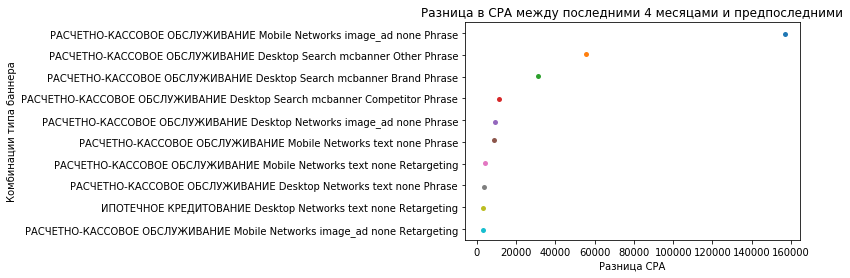

In [124]:
sns.stripplot(y = 'label', x = 'cpa_diff_abs', data = sigma_periods_diff.head(10))
plt.title('Разница в CPA между последними 4 месяцами и предпоследними')
plt.xlabel('Разница CPA')
plt.ylabel('Комбинации типа баннера')
#plt.figsize(3,5)

На графике видно, что большую часть прироста cpa обеспечили 

Приросла категория РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ со следующими типами:

    0.	Mobile	Networks	image_ad	none	Phrase | С абсолютным приростом cpa: 156771.44
    1.	Desktop	Search	mcbanner	Other	Phrase | С абсолютным приростом cpa: 55393.23
    2.	Desktop	Search	mcbanner	Brand	Phrase | С абсолютным приростом cpa: 31317.44
    3.	Desktop	Search	mcbanner	Competitor	Phrase | С абсолютным приростом cpa: 11131.43
    4.	Desktop	Networks	image_ad	none	Phrase | С абсолютным приростом cpa: 9214.30
    5.	Mobile	Networks	text	none	Phrase	 | С абсолютным приростом cpa: 8841.46
    6.	Mobile	Networks	text	none	Retargeting	 | С абсолютным приростом cpa: 4104.41
    7.	Desktop	Networks	text	none	Phrase	 | С абсолютным приростом cpa: 3533.11
    8.	Mobile	Networks	image_ad	none	Retargeting	 | С абсолютным приростом cpa: 3012.87
    9.	ИПОТЕЧНОЕ КРЕДИТОВАНИЕ	Desktop	Networks	text	none	Retargeting	 | С абсолютным приростом cpa: 3146.416678

In [125]:
check_sigma_cpa = data[data['client'] == 'Сигма'].merge(sigma_periods_diff.head(10), on = ['category','device', 'place', 'bannertype',
       'querytype (search only)', 'targetingtype'], how = 'left')
check_sigma_cpa = check_sigma_cpa[check_sigma_cpa['label'].isna()]
check_sigma_cpa.head()

,client,month,category,device,place,bannertype,querytype (search only),targetingtype,shows,clicks,cost,conversions,cpa_now,cpa_prev,cpa_diff_abs,cpa_diff_perc,label
1,Сигма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,215,2,52.658212,0,NaN,NaN,NaN,NaN,NaN
3,Сигма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,text,none,Retargeting,45630,50,1536.406424,0,NaN,NaN,NaN,NaN,NaN
4,Сигма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,text,Brand,Phrase,6933,1036,27636.633508,0,NaN,NaN,NaN,NaN,NaN
5,Сигма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,text,Competitor,Phrase,11951,420,30360.942381,0,NaN,NaN,NaN,NaN,NaN
6,Сигма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,text,Other,Phrase,28494,1362,165137.570593,0,NaN,NaN,NaN,NaN,NaN


In [126]:
check_sigma_conversion = check_sigma_cpa.groupby(['month']).agg({'cost':sum, 'conversions':sum})
check_sigma_conversion['cpa']=check_sigma_conversion['cost']/check_sigma_conversion['conversions']
check_sigma_conversion

,cost,conversions,cpa
month,,,
2021-04-01,1.869544e+07,57275,326.415378
2021-05-01,1.790269e+07,36056,496.524604
2021-06-01,1.586095e+07,22415,707.604153
2021-07-01,2.091530e+07,43592,479.796664
2021-08-01,2.469906e+07,67208,367.501754
2021-09-01,2.267687e+07,65974,343.724415
2021-10-01,2.590128e+07,59397,436.070536
2021-11-01,1.910724e+07,55638,343.420654
2021-12-01,2.147324e+07,51720,415.182530


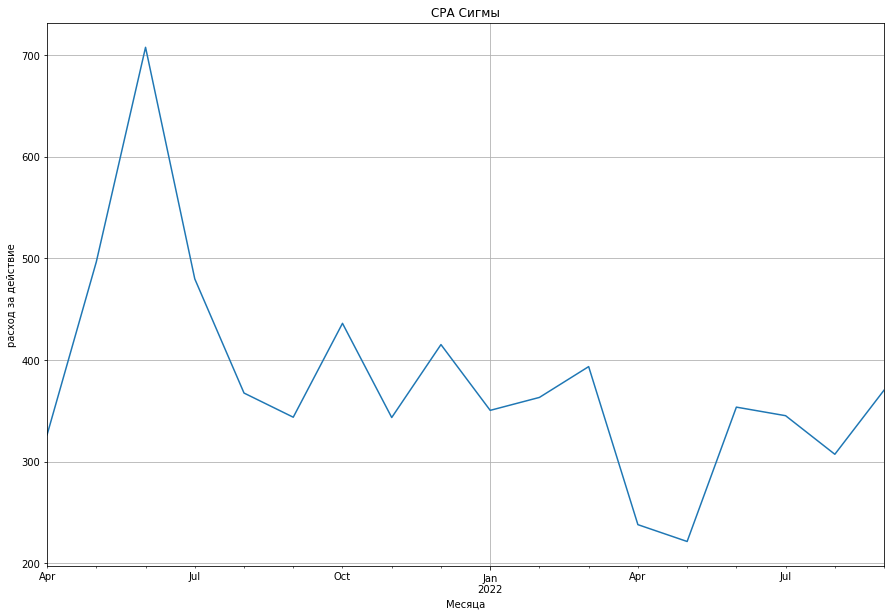

In [127]:
check_sigma_conversion['cpa'].plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='СРА Сигмы', grid=True)
plt.show()

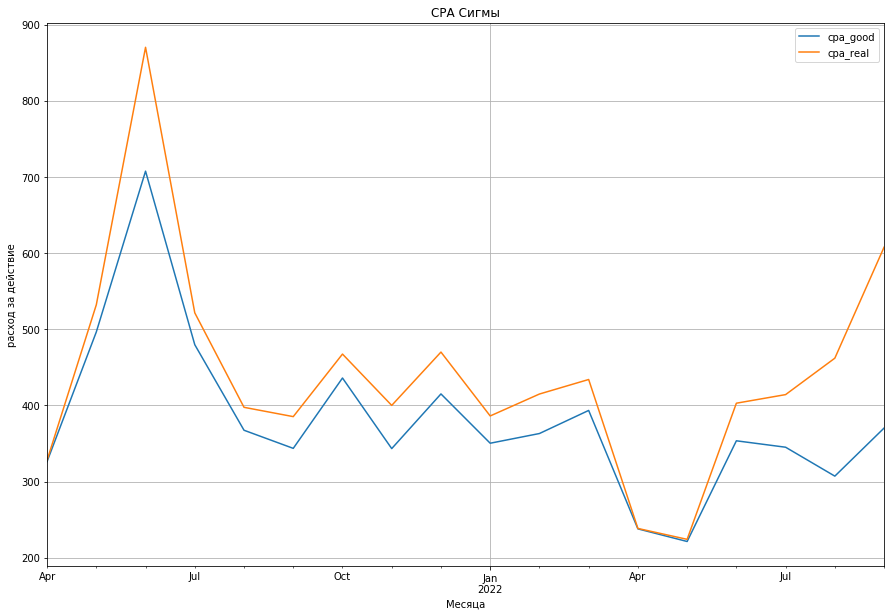

In [128]:
pd.merge(left = check_sigma_conversion['cpa'], right = cost_conversion_sigma['cpa'],  left_index=True, right_index=True, suffixes = ('_good', '_real')).plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='СРА Сигмы', grid=True)
plt.show()


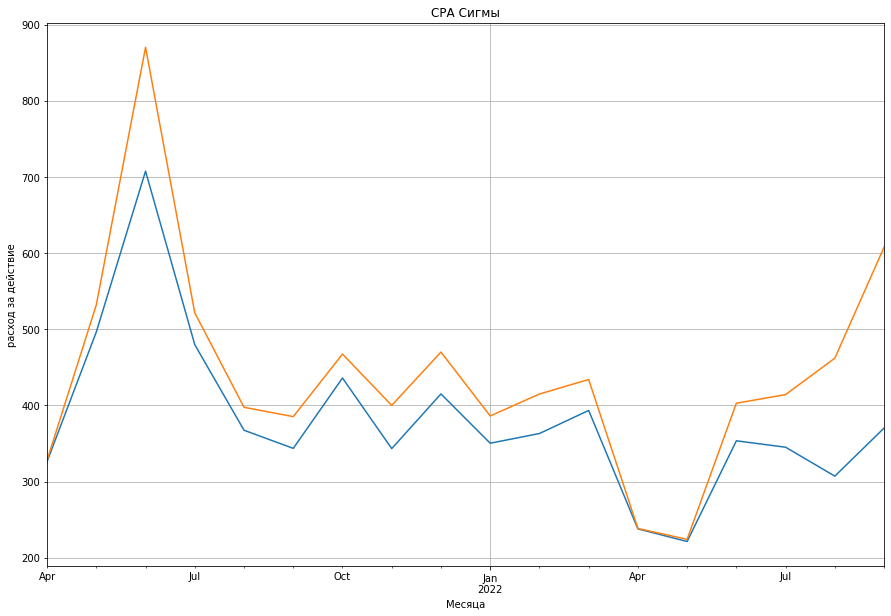

In [129]:
check_sigma_conversion['cpa'].plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='СРА Сигмы', grid=True)
cost_conversion_sigma['cpa'].plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='СРА Сигмы', grid=True)
plt.show()

На графике видно, что найденные комбинации с выросшим cpa ответственны за сильный рост CPA.

### Распределение затрат по клиентам

In [130]:
data_cpa_clients = pd.pivot_table(cost_conversion, values='cpa', index='month', columns='client', aggfunc='sum', fill_value=None, margins=False, dropna=False, margins_name='All', sort=True)
data_cpa_clients = round(data_cpa_clients, 2)

data_cpa_clients

client,Альфа,Бета,Гамма,Дельта,Зета,Лямбда,Мета,Омега,Псилон,Сигма
month,,,,,,,,,,
2021-04-01,6048.61,1939.38,500.96,5166.41,4171.22,264.06,143.73,4869.00,1235.39,328.18
2021-05-01,2115.69,1134.04,373.30,5793.16,653.56,189.02,154.26,6039.42,1675.44,532.18
2021-06-01,1510.27,1322.48,398.83,6196.00,523.29,270.71,177.41,1233.95,1607.43,870.19
2021-07-01,1221.75,1242.41,350.65,8298.72,513.36,181.69,265.08,1005.93,1054.11,521.60
2021-08-01,1334.26,2125.97,359.64,8799.62,666.39,320.57,201.31,966.91,746.57,397.61
2021-09-01,1461.77,1420.69,448.37,7363.54,825.69,405.76,166.97,1240.25,749.85,385.38
2021-10-01,1616.97,1452.25,555.83,8688.92,1018.12,485.12,200.53,1199.71,924.92,467.50
2021-11-01,1354.02,1388.20,521.72,7244.60,799.79,388.63,208.04,829.98,782.84,400.11
2021-12-01,1233.18,1398.57,448.23,6447.73,635.94,296.59,134.21,1548.48,749.15,470.12


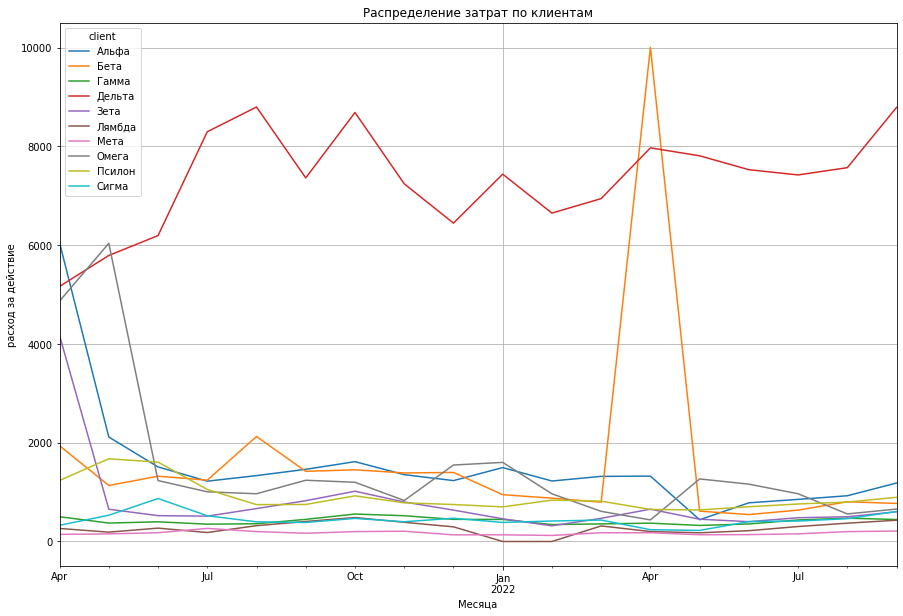

In [131]:

data_cpa_clients.plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='Распределение затрат по клиентам', grid=True)

plt.show()

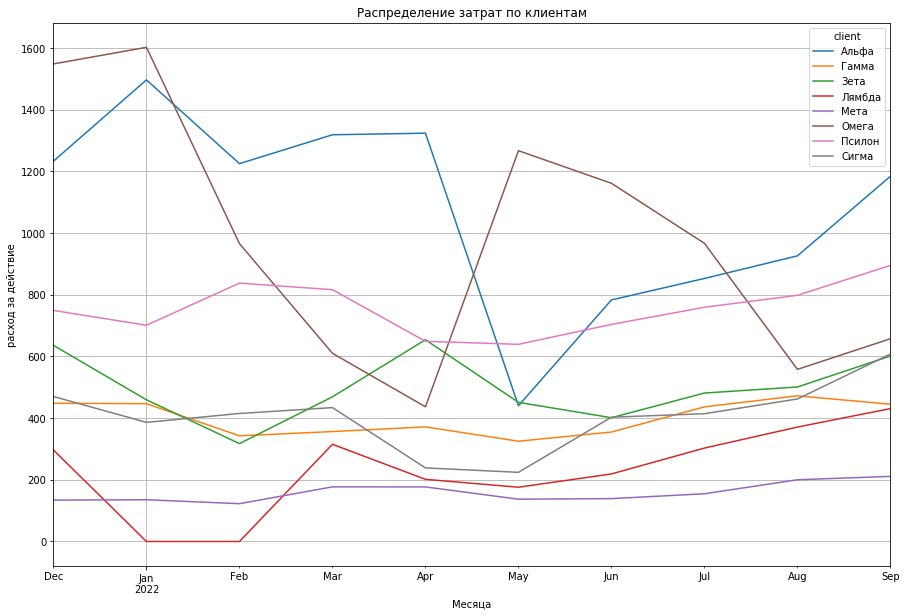

In [132]:
data_cpa_clients.drop(columns = ['Дельта', 'Бета']).tail(10).plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='Распределение затрат по клиентам', grid=True)
plt.show()

Больше всего затрат у клиента Дельта от 6000 до 10000. У остальных в пределах 2000, но наблюдаются всплески в апреле прошлого года у  Зеты, Альфы, Омеги до 6000. У беты рекий всплеск в апреле этого года у Беты. 

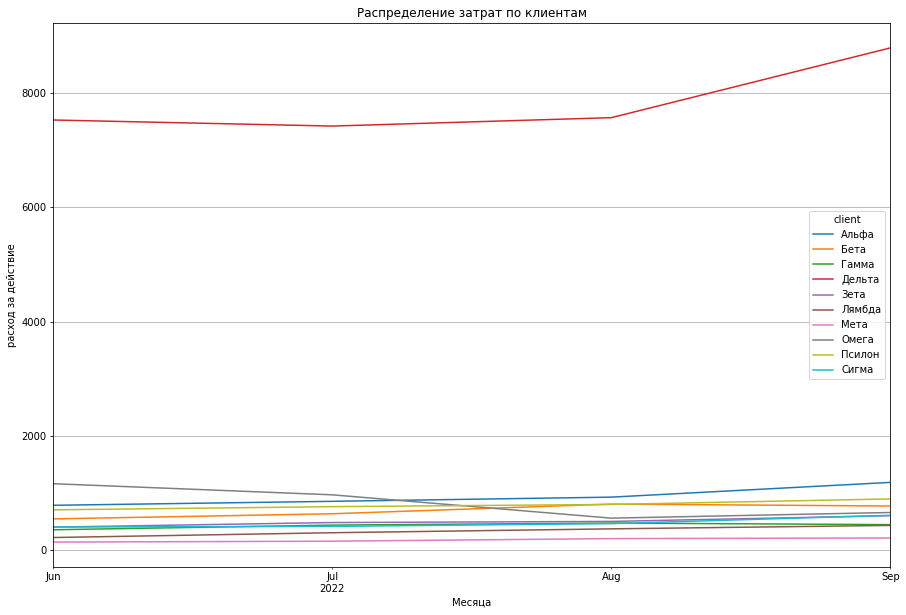

In [133]:
data_cpa_clients.tail(4).plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='Распределение затрат по клиентам', grid=True)

plt.show()

In [134]:
conclusion(data_cpa_clients)

Распределение затрат в пределах 380 рублей:
 * Мета - от 139.03 до 211.15

Распределение затрат более 380 рублей:
 * Альфа - от 783.26 до 1184.3
 * Бета - от 545.28 до 804.64
 * Гамма - от 354.91 до 472.39
 * Дельта - от 7424.04 до 8792.71
 * Зета - от 401.3 до 601.48
 * Лямбда - от 219.05 до 430.91
 * Омега - от 558.14 до 1161.41
 * Псилон - от 703.86 до 895.25
 * Сигма - от 403.0 до 607.81


### Распределение затрат Сигма по категориям

Подготовим данные по клиентам по месяцам, категориям, стоимости рекламы и целевых действий.

Посчитаем Стоимость за дествие показатель cpa, добавив новую колонку.

In [135]:
cost_conversion_category = data.groupby(['client', 'category', 'month']).agg({'cost':sum, 'conversions':sum})
cost_conversion_category['cpa']=cost_conversion_category['cost']/cost_conversion_category['conversions']
cost_conversion_category

cost  conversions  \
client category                       month                                   
Альфа  ВКЛАДЫ                         2021-04-01  5.347690e+06          157   
                                      2021-05-01  7.854693e+06          167   
                                      2021-06-01  9.001042e+06          204   
                                      2021-07-01  6.423104e+06          143   
                                      2021-08-01  7.521091e+06          117   
...                                                        ...          ...   
Сигма  РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ 2022-05-01  2.963554e+06          900   
                                      2022-06-01  7.888678e+06         2110   
                                      2022-07-01  1.163129e+07         2713   
                                      2022-08-01  1.508409e+07         1943   
                                      2022-09-01  6.844504e+06          678   

                                                           cpa  
client category                       month                     
Альфа  ВКЛАДЫ                         2021-04-01  34061.716564  
                                      2021-05-01  47034.091719  
                                      2021-06-01  44122.755843  
                                      2021-07-01  44916.809725  
                                      2021-08-01  64282.826661  
...                                                        ...  
Сигма  РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ 2022-05-01   3292.837462  
                                      2022-06-01   3738.709884  
                                      2022-07-01   4287.242225  
                                      2022-08-01   7763.300426  
                                      2022-09-01  10095.138745  

[751 rows x 3 columns]

In [136]:
cost_conversion_category_sigma=cost_conversion_category.loc['Сигма']
cost_conversion_category_sigma

cost  conversions  \
category                       month                                   
ВКЛАДЫ                         2021-04-01  1.754110e+06        18655   
                               2021-05-01  1.527130e+06        15953   
                               2021-06-01  1.455915e+06        13700   
                               2021-07-01  1.863885e+06        13107   
                               2021-08-01  1.765430e+06        12556   
...                                                 ...          ...   
РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ 2022-05-01  2.963554e+06          900   
                               2022-06-01  7.888678e+06         2110   
                               2022-07-01  1.163129e+07         2713   
                               2022-08-01  1.508409e+07         1943   
                               2022-09-01  6.844504e+06          678   

                                                    cpa  
category                       month                     
ВКЛАДЫ                         2021-04-01     94.028968  
                               2021-05-01     95.726838  
                               2021-06-01    106.271179  
                               2021-07-01    142.205340  
                               2021-08-01    140.604483  
...                                                 ...  
РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ 2022-05-01   3292.837462  
                               2022-06-01   3738.709884  
                               2022-07-01   4287.242225  
                               2022-08-01   7763.300426  
                               2022-09-01  10095.138745  

[114 rows x 3 columns]

In [137]:
data_cpa_clients_category_sigma = pd.pivot_table(cost_conversion_category_sigma, values='cpa', index='month', columns='category', aggfunc='sum', fill_value=0, margins=False, dropna=False, margins_name='All', sort=True)
data_cpa_clients_category_sigma = round(data_cpa_clients_category_sigma, 2)

data_cpa_clients_category_sigma

category,ВКЛАДЫ,ДЕБЕТОВЫЕ КАРТЫ,ИНВЕСТИЦИИ,ИПОТЕЧНОЕ КРЕДИТОВАНИЕ,КРЕДИТНЫЕ КАРТЫ,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ
month,,,,,,,
2021-04-01,94.03,274.88,0.0,2200.29,264.94,331.78,inf
2021-05-01,95.73,275.64,0.0,3662.20,415.08,545.59,5894.51
2021-06-01,106.27,327.66,0.0,6883.27,1111.39,1413.01,5380.23
2021-07-01,142.21,294.36,inf,2860.49,234.61,313.15,4951.22
2021-08-01,140.60,393.22,inf,1165.17,166.86,280.70,4706.54
2021-09-01,131.44,293.12,inf,1133.42,181.75,261.19,5957.60
2021-10-01,105.99,726.52,inf,1023.18,209.32,273.79,15454.23
2021-11-01,83.20,660.27,inf,789.72,159.38,271.55,12858.18
2021-12-01,76.93,383.37,inf,1191.74,139.61,290.73,7948.35


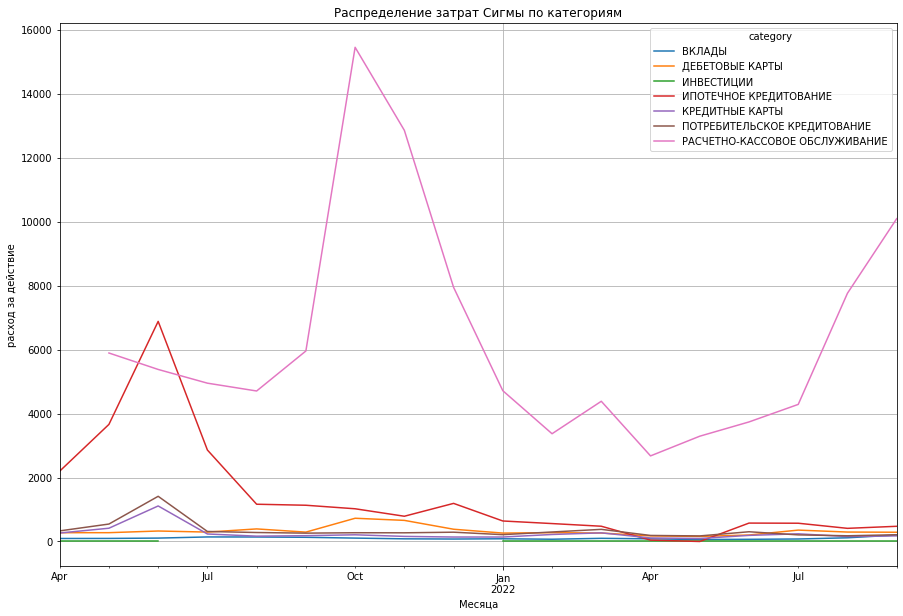

In [138]:

data_cpa_clients_category_sigma.plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='Распределение затрат Сигмы по категориям', grid=True)

plt.show()

Больше затрат у Сигмы уходит на расчетно-кассовое обслуживание от 4 000 до 16 000рублей.

Мы видим, что с апреля по август 2021 года постепенно расходы падали с 6 000 до 4 500.

С августа 2021 года по октябрь 2021 резко возврастают расходы до 16 000 рублей. С октября 2021 года по фераль резко падает до 4 000 рублей.

С июля 2022 года по сентябрь резко возрастает до 10 000 рублей. Возможно это связано с сезонностью.

Еще виден всплеск Ипотечного кредитования с апреля 2021 по июнь 2021 с 2 000 до 7 000. И потом падение с июня по август 2021г. с 7 000 до 1 000.

Категории которые в пределах 380 за действие с июня по сентябрь 2022г.:
 - вклады - с 68 до 202;
 - дебетовые карты - с 202 до 289;
 - кредитные карты - с 150 до 190;
 - потребитльское кредитование - с 170 до 304
 
 
Категории которые за пределами 380 за действие с июня по сентябрь 2022г.:
- расчетно-кассовое обслуживание - с 4 000 до 10 000
- ипотечное кредитование - с 400 до 600;

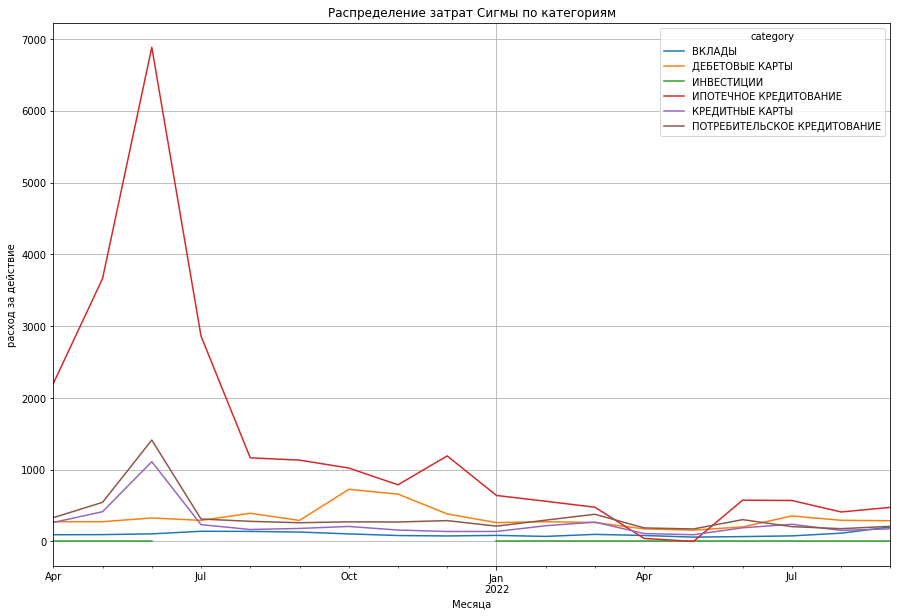

In [139]:

data_cpa_clients_category_sigma.drop(columns=['РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ']).plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='Распределение затрат Сигмы по категориям', grid=True)

plt.show()

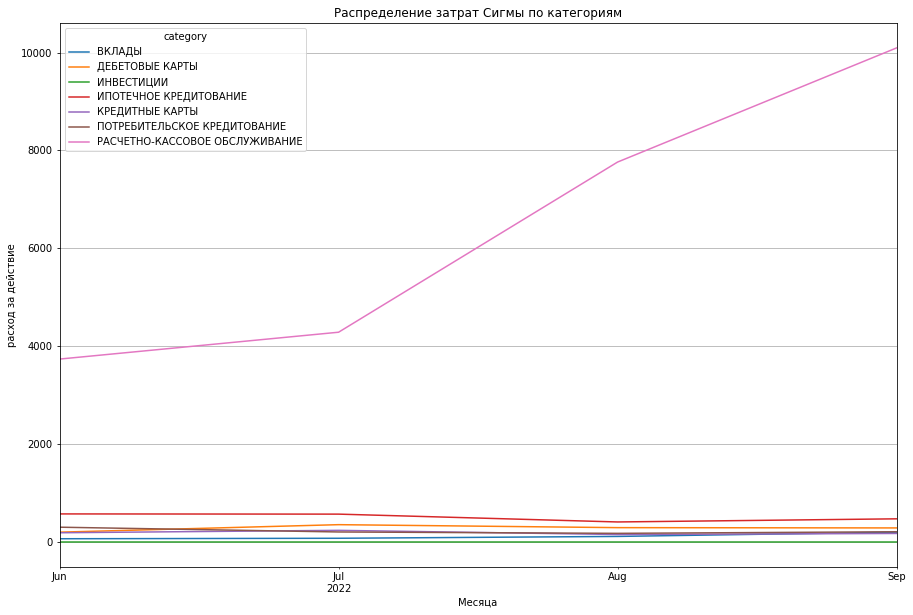

In [140]:
data_cpa_clients_category_sigma.tail(4).plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='Распределение затрат Сигмы по категориям', grid=True)

plt.show()

In [141]:
conclusion(data_cpa_clients_category_sigma)

Распределение затрат в пределах 380 рублей:
 * ВКЛАДЫ - от 68.17 до 202.4
 * ДЕБЕТОВЫЕ КАРТЫ - от 202.85 до 355.91
 * КРЕДИТНЫЕ КАРТЫ - от 154.47 до 239.97
 * ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ - от 178.59 до 304.34

Распределение затрат более 380 рублей:
 * ИПОТЕЧНОЕ КРЕДИТОВАНИЕ - от 411.2 до 575.52
 * РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ - от 3738.71 до 10095.14


### Распределение затрат Сигма по девайсам

Подготовим данные по клиентам по месяцам, девайсам, стоимости рекламы и целевых действий.

Посчитаем Стоимость за дествие показатель cpa, добавив новую колонку.

In [142]:
cost_conversion_device = data.groupby(['client', 'device', 'month']).agg({'cost':sum, 'conversions':sum})
cost_conversion_device['cpa']=cost_conversion_device['cost']/cost_conversion_device['conversions']
cost_conversion_device

cost  conversions          cpa
client device  month                                             
Альфа  Desktop 2021-04-01  6.159830e+06          906  6798.929224
               2021-05-01  7.004325e+06         2537  2760.869087
               2021-06-01  7.411261e+06         3817  1941.645625
               2021-07-01  5.663611e+06         3805  1488.465503
               2021-08-01  5.753376e+06         4085  1408.415280
...                                 ...          ...          ...
Сигма  Mobile  2022-05-01  3.484513e+06        22817   152.715641
               2022-06-01  1.409854e+07        39941   352.984028
               2022-07-01  1.630040e+07        44798   363.864457
               2022-08-01  1.590344e+07        38316   415.060066
               2022-09-01  6.881638e+06        12189   564.577762

[360 rows x 3 columns]

In [143]:
cost_conversion_device_sigma=cost_conversion_device.loc['Сигма']
cost_conversion_device_sigma

cost  conversions          cpa
device  month                                             
Desktop 2021-04-01  8.748464e+06        27925   313.284312
        2021-05-01  9.904067e+06        18361   539.407812
        2021-06-01  8.572362e+06        12254   699.556213
        2021-07-01  1.151432e+07        20352   565.758480
        2021-08-01  1.377555e+07        28101   490.215765
        2021-09-01  1.436186e+07        26454   542.899297
        2021-10-01  1.467511e+07        23309   629.589868
        2021-11-01  1.115883e+07        22552   494.804312
        2021-12-01  1.211293e+07        19126   633.322442
        2022-01-01  8.358879e+06        13414   623.145893
        2022-02-01  1.120661e+07        20031   559.463452
        2022-03-01  1.417035e+07        27942   507.134539
        2022-04-01  3.930906e+06        10286   382.160767
        2022-05-01  4.701692e+06        13680   343.690926
        2022-06-01  1.053024e+07        21173   497.342872
        2022-07-01  1.160823e+07        22567   514.389681
        2022-08-01  1.148998e+07        20963   548.107684
        2022-09-01  4.864959e+06         7137   681.653170
Mobile  2021-04-01  1.004989e+07        29356   342.345291
        2021-05-01  9.357594e+06        17833   524.734716
        2021-06-01  1.119130e+07        10458  1070.118317
        2021-07-01  1.130276e+07        23392   483.189015
        2021-08-01  1.301968e+07        39290   331.373974
        2021-09-01  1.117864e+07        39819   280.736349
        2021-10-01  1.315737e+07        36226   363.202428
        2021-11-01  1.113269e+07        33162   335.706194
        2021-12-01  1.223716e+07        32669   374.580288
        2022-01-01  6.763642e+06        25737   262.798401
        2022-02-01  1.151674e+07        34718   331.722463
        2022-03-01  2.051043e+07        51944   394.856650
        2022-04-01  2.305041e+06        15851   145.419264
        2022-05-01  3.484513e+06        22817   152.715641
        2022-06-01  1.409854e+07        39941   352.984028
        2022-07-01  1.630040e+07        44798   363.864457
        2022-08-01  1.590344e+07        38316   415.060066
        2022-09-01  6.881638e+06        12189   564.577762

In [144]:
data_cpa_clients_device_sigma = pd.pivot_table(cost_conversion_device_sigma, values='cpa', index='month', columns='device', aggfunc='sum', fill_value=0, margins=False, dropna=False, margins_name='All', sort=True)
data_cpa_clients_device_sigma = round(data_cpa_clients_device_sigma, 2)

data_cpa_clients_device_sigma

device,Desktop,Mobile
month,,
2021-04-01,313.28,342.35
2021-05-01,539.41,524.73
2021-06-01,699.56,1070.12
2021-07-01,565.76,483.19
2021-08-01,490.22,331.37
2021-09-01,542.90,280.74
2021-10-01,629.59,363.20
2021-11-01,494.80,335.71
2021-12-01,633.32,374.58


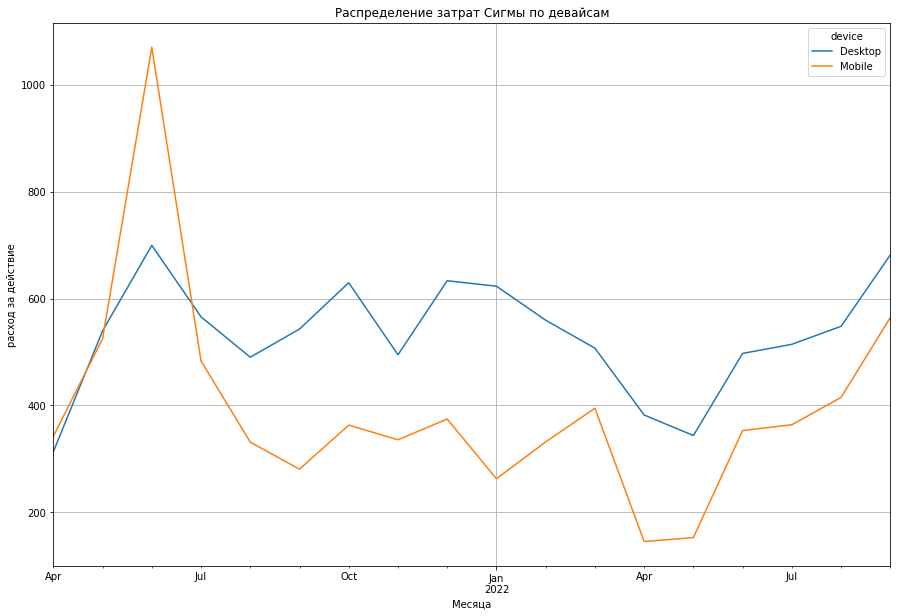

In [145]:
data_cpa_clients_device_sigma.plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='Распределение затрат Сигмы по девайсам', grid=True)

plt.show()

Мы видим, что реклама на компьютерах в основном дороже.

На мобильных устройствах резкий подъем с апреля по июнь 2021 года с 300 по 1 000. Следом резкое падение с июня  по сентябрь 2021 года с 1 000 до 300 рублей. Потом идет падение с марта по апрель 2022г. с 400 до 200. Следом подъем с апреля по август 2022г. до 600.

На компьютерах падение с декабря по май 2022 года с 600 до 400. Следом резкое подъем с апреля по август 2022г. с 400 до 700


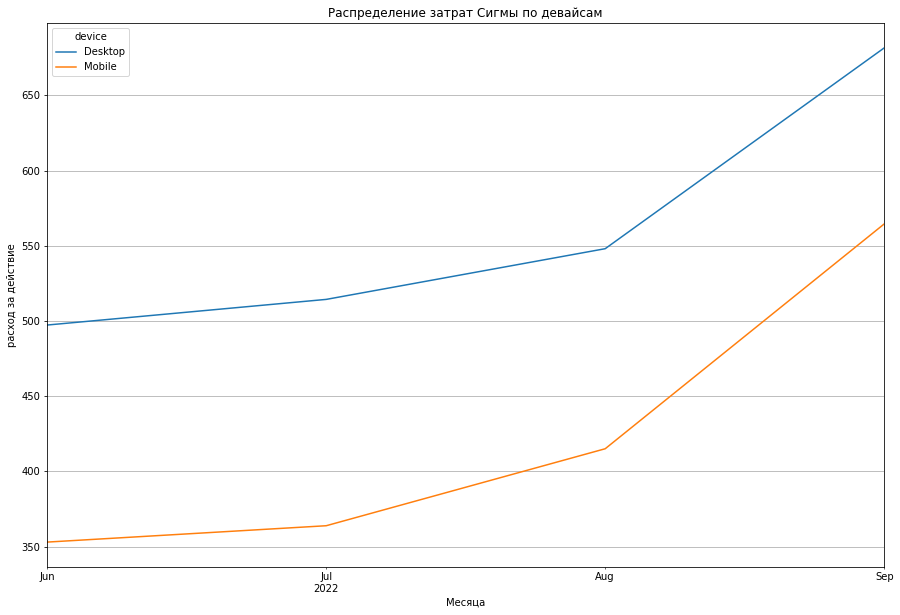

In [146]:
data_cpa_clients_device_sigma.tail(4).plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='Распределение затрат Сигмы по девайсам', grid=True)

plt.show()

In [147]:
conclusion(data_cpa_clients_device_sigma)

Распределение затрат в пределах 380 рублей:
Нет

Распределение затрат более 380 рублей:
 * Desktop - от 497.34 до 681.65
 * Mobile - от 352.98 до 564.58


### Распределение затрат Сигма по месту

Подготовим данные по клиентам по месяцам, месту, стоимости рекламы и целевых действий.

Посчитаем Стоимость за дествие показатель cpa, добавив новую колонку.

In [148]:
cost_conversion_place = data.groupby(['client', 'place', 'month']).agg({'cost':sum, 'conversions':sum})
cost_conversion_place['cpa']=cost_conversion_place['cost']/cost_conversion_place['conversions']
cost_conversion_place

cost  conversions           cpa
client place    month                                              
Альфа  Networks 2021-04-01  4.170493e+06          105  39718.977146
                2021-05-01  6.109010e+06          458  13338.449375
                2021-06-01  6.670655e+06         1048   6365.128959
                2021-07-01  4.899338e+06         1612   3039.291778
                2021-08-01  6.478758e+06         1276   5077.396486
...                                  ...          ...           ...
Сигма  Search   2022-05-01  7.607270e+06        29489    257.969758
                2022-06-01  1.638124e+07        47017    348.410999
                2022-07-01  1.782618e+07        51271    347.685343
                2022-08-01  1.564084e+07        49558    315.606845
                2022-09-01  6.113031e+06        16961    360.416901

[360 rows x 3 columns]

In [149]:
cost_conversion_place_sigma=cost_conversion_place.loc['Сигма']
cost_conversion_place_sigma

cost  conversions          cpa
place    month                                             
Networks 2021-04-01  4.514190e+06        15241   296.187235
         2021-05-01  4.355025e+06        12812   339.917690
         2021-06-01  7.329334e+06        10484   699.097085
         2021-07-01  6.532222e+06        12937   504.925579
         2021-08-01  8.616858e+06        19392   444.351169
         2021-09-01  8.345300e+06        18866   442.345998
         2021-10-01  8.396263e+06        19890   422.134892
         2021-11-01  8.247028e+06        22074   373.608216
         2021-12-01  6.981840e+06        12899   541.269871
         2022-01-01  2.989291e+06         7672   389.636531
         2022-02-01  7.575281e+06        13443   563.511218
         2022-03-01  1.544629e+07        30564   505.375344
         2022-04-01  3.641535e+05         5921    61.502032
         2022-05-01  5.789344e+05         7008    82.610508
         2022-06-01  8.247536e+06        14097   585.056095
         2022-07-01  1.008246e+07        16094   626.473009
         2022-08-01  1.175258e+07         9721  1208.988667
         2022-09-01  5.633566e+06         2365  2382.057484
Search   2021-04-01  1.428416e+07        42040   339.775526
         2021-05-01  1.490664e+07        23382   637.526113
         2021-06-01  1.243433e+07        12228  1016.873189
         2021-07-01  1.628485e+07        30807   528.608817
         2021-08-01  1.817838e+07        47999   378.724115
         2021-09-01  1.719520e+07        47407   362.714348
         2021-10-01  1.943622e+07        39645   490.256486
         2021-11-01  1.404449e+07        33640   417.493695
         2021-12-01  1.736825e+07        38896   446.530450
         2022-01-01  1.213323e+07        31479   385.438864
         2022-02-01  1.514807e+07        41306   366.728116
         2022-03-01  1.923450e+07        49322   389.978003
         2022-04-01  5.871793e+06        20216   290.452754
         2022-05-01  7.607270e+06        29489   257.969758
         2022-06-01  1.638124e+07        47017   348.410999
         2022-07-01  1.782618e+07        51271   347.685343
         2022-08-01  1.564084e+07        49558   315.606845
         2022-09-01  6.113031e+06        16961   360.416901

In [150]:
data_cpa_clients_place_sigma = pd.pivot_table(cost_conversion_place_sigma, values='cpa', index='month', columns='place', aggfunc='sum', fill_value=0, margins=False, dropna=False, margins_name='All', sort=True)
data_cpa_clients_place_sigma = round(data_cpa_clients_place_sigma, 2)

data_cpa_clients_place_sigma

place,Networks,Search
month,,
2021-04-01,296.19,339.78
2021-05-01,339.92,637.53
2021-06-01,699.10,1016.87
2021-07-01,504.93,528.61
2021-08-01,444.35,378.72
2021-09-01,442.35,362.71
2021-10-01,422.13,490.26
2021-11-01,373.61,417.49
2021-12-01,541.27,446.53


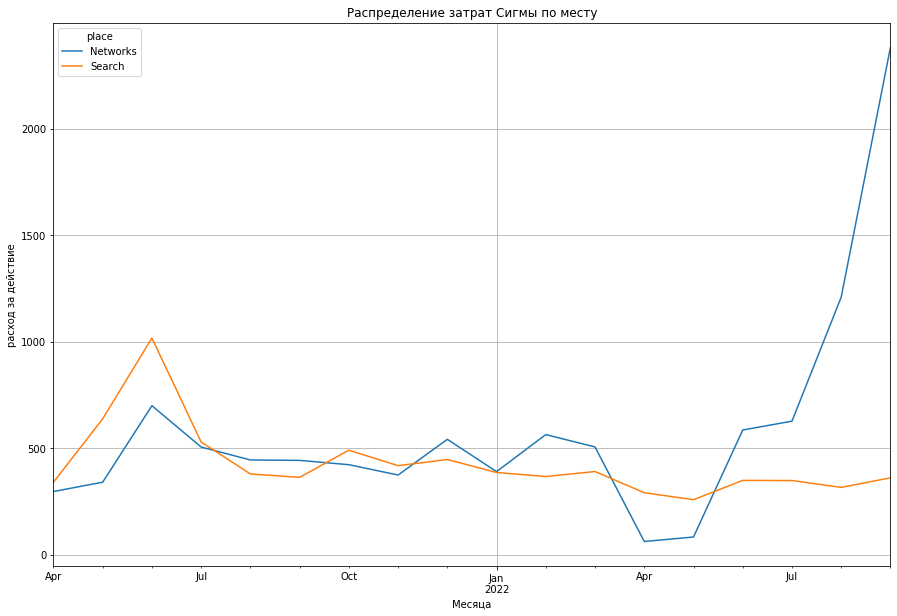

In [151]:
data_cpa_clients_place_sigma.plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='Распределение затрат Сигмы по месту', grid=True)

plt.show()

Рамещение в поиске более стабильное  и низкое, только подъем с апреля по июнь 2021г.  с 400 до 1000. Спад  с июня по август 2021г. с 1000 до 400.

Размещенение в Networks  более нестабильное и с марта по апрель 2022 падает  с 500 до 100. С апреля по август 2022г. поднимается с 100 до 3000.

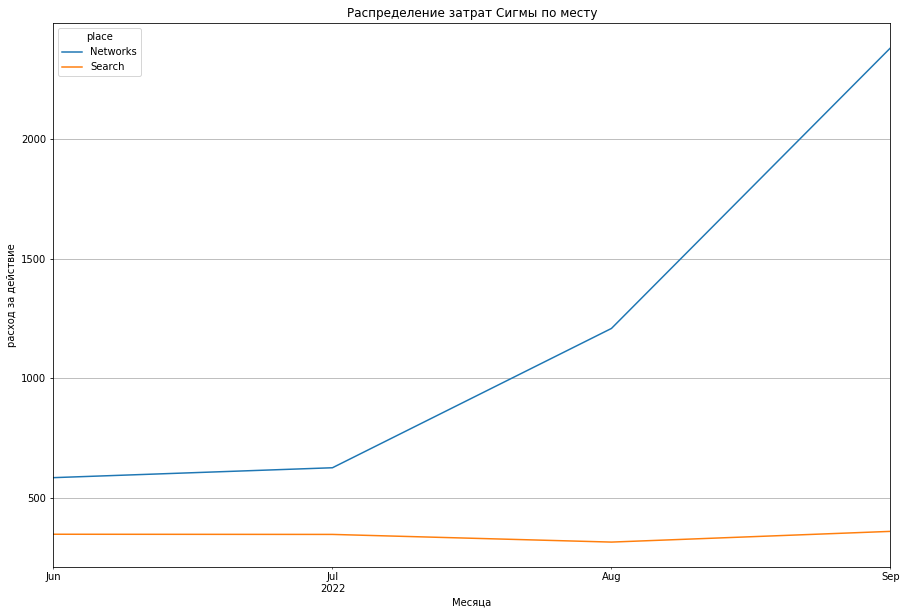

In [152]:
data_cpa_clients_place_sigma.tail(4).plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='Распределение затрат Сигмы по месту', grid=True)

plt.show()

In [153]:
conclusion(data_cpa_clients_place_sigma)

Распределение затрат в пределах 380 рублей:
 * Search - от 315.61 до 360.42

Распределение затрат более 380 рублей:
 * Networks - от 585.06 до 2382.06


### Распределение затрат Сигма по типу баннера

Подготовим данные по клиентам по месяцам, типу баннера, стоимости рекламы и целевых действий.

Посчитаем Стоимость за дествие показатель cpa, добавив новую колонку.

In [154]:
cost_conversion_bannertype = data.groupby(['client', 'bannertype', 'month']).agg({'cost':sum, 'conversions':sum})
cost_conversion_bannertype['cpa']=cost_conversion_bannertype['cost']/cost_conversion_bannertype['conversions']
cost_conversion_bannertype

cost  conversions          cpa
client bannertype month                                             
Альфа  cpm_banner 2021-05-01  0.000000e+00            0          NaN
       image_ad   2021-04-01  9.343632e+04           33  2831.403567
                  2021-05-01  1.229713e+05           50  2459.426162
                  2021-06-01  3.642081e+05          181  2012.199382
                  2021-07-01  1.587074e+05           29  5472.670524
...                                    ...          ...          ...
Сигма  text       2022-05-01  8.181836e+06        36497   224.178328
                  2022-06-01  2.455761e+07        61106   401.885338
                  2022-07-01  2.778218e+07        67350   412.504584
                  2022-08-01  2.694711e+07        59271   454.642395
                  2022-09-01  1.156215e+07        19317   598.547951

[630 rows x 3 columns]

In [155]:
cost_conversion_bannertype_sigma=cost_conversion_bannertype.loc['Сигма']
cost_conversion_bannertype_sigma

cost  conversions         cpa
bannertype month                                            
cpc_video  2021-04-01  4.138104e+02            0         inf
           2021-05-01  1.447874e+03            0         inf
           2021-09-01  0.000000e+00            0         NaN
           2021-10-01  0.000000e+00            0         NaN
           2021-11-01  0.000000e+00            0         NaN
...                             ...          ...         ...
text       2022-05-01  8.181836e+06        36497  224.178328
           2022-06-01  2.455761e+07        61106  401.885338
           2022-07-01  2.778218e+07        67350  412.504584
           2022-08-01  2.694711e+07        59271  454.642395
           2022-09-01  1.156215e+07        19317  598.547951

[69 rows x 3 columns]

In [156]:
data_cpa_clients_bannertype_sigma = pd.pivot_table(cost_conversion_bannertype_sigma, values='cpa', index='month', columns='bannertype', aggfunc='sum', fill_value=0, margins=False, dropna=False, margins_name='All', sort=True)
data_cpa_clients_bannertype_sigma = round(data_cpa_clients_bannertype_sigma, 2)

data_cpa_clients_bannertype_sigma

bannertype,cpc_video,cpm_banner,image_ad,mcbanner,text
month,,,,,
2021-04-01,inf,0,1355.91,0.00,328.15
2021-05-01,inf,0,978.55,inf,531.78
2021-06-01,0.0,0,1188.68,14175.46,868.16
2021-07-01,0.0,0,1606.26,42061.94,517.66
2021-08-01,0.0,0,906.83,18340.78,396.00
2021-09-01,0.0,0,938.86,103905.22,383.63
2021-10-01,0.0,0,17990.01,inf,466.31
2021-11-01,0.0,0,80086.36,inf,396.40
2021-12-01,0.0,0,4690.92,2164.19,459.24


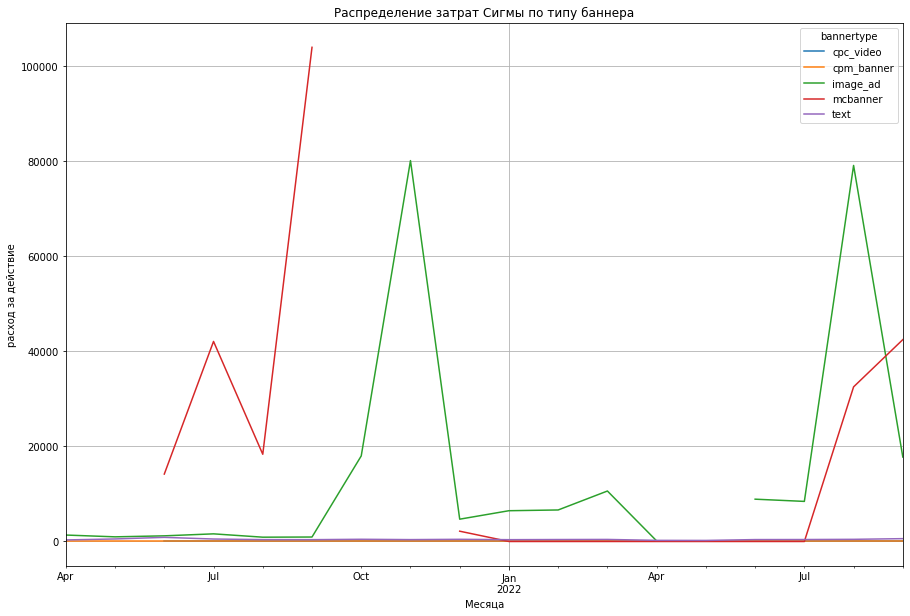

In [157]:
data_cpa_clients_bannertype_sigma.plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='Распределение затрат Сигмы по типу баннера', grid=True)

plt.show()

Текст стабильно от  300 до 500 весь период.

image_ad возрастает с сентября по ноябрь 2021г. возрастает с 300 до  80 000. Это показатель, что рекаламма на таких баннерах не эффективна. Следом идет падение с ноября по декабрь 2021г 80 000 до 5 000. С июля  по август 2022г. подъем с 5 000 до 80 000, потом падение с авгутса по сентябрь с 80 00 до 18 000.

mcbanner с июня по авгутс 2021г. возрастает с 17 000 до 100 000. Что тоже является не эффективным показателем рекламы. С июля по сентябрь 2022г. подъем с 0 до  40 000.

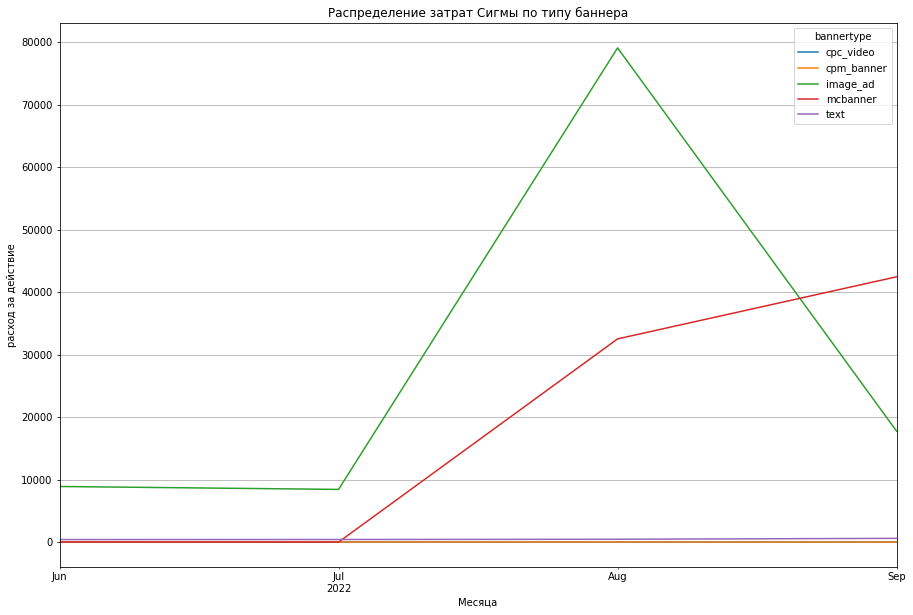

In [158]:
data_cpa_clients_bannertype_sigma.tail(4).plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='Распределение затрат Сигмы по типу баннера', grid=True)

plt.show()

In [159]:
conclusion(data_cpa_clients_bannertype_sigma)

Распределение затрат в пределах 380 рублей:
Нет

Распределение затрат более 380 рублей:
 * image_ad - от 8429.88 до 79067.87
 * mcbanner - от 0.0 до 42446.06
 * text - от 401.89 до 598.55


### Распределение затрат Сигма по типу запроса

Подготовим данные по клиентам по месяцам, типу запроса, стоимости рекламы и целевых действий.

Посчитаем Стоимость за дествие показатель cpa, добавив новую колонку.

In [160]:
cost_conversion_querytype = data.groupby(['client', 'querytype (search only)', 'month']).agg({'cost':sum, 'conversions':sum})
cost_conversion_querytype['cpa']=cost_conversion_querytype['cost']/cost_conversion_querytype['conversions']
cost_conversion_querytype

cost  conversions  \
client querytype (search only) month                                   
Альфа  Brand                   2021-04-01  1.106402e+06         1017   
                               2021-05-01  7.757275e+05         2286   
                               2021-06-01  9.303940e+05         2776   
                               2021-07-01  9.967338e+05         3034   
                               2021-08-01  1.058344e+06         3407   
...                                                 ...          ...   
Сигма  none                    2022-05-01  5.789344e+05         7008   
                               2022-06-01  8.247536e+06        14097   
                               2022-07-01  1.008246e+07        16094   
                               2022-08-01  1.175258e+07         9721   
                               2022-09-01  5.633566e+06         2365   

                                                   cpa  
client querytype (search only) month                    
Альфа  Brand                   2021-04-01  1087.907669  
                               2021-05-01   339.338360  
                               2021-06-01   335.156341  
                               2021-07-01   328.521357  
                               2021-08-01   310.637986  
...                                                ...  
Сигма  none                    2022-05-01    82.610508  
                               2022-06-01   585.056095  
                               2022-07-01   626.473009  
                               2022-08-01  1208.988667  
                               2022-09-01  2382.057484  

[720 rows x 3 columns]

In [161]:
cost_conversion_querytype_sigma=cost_conversion_querytype.loc['Сигма']
cost_conversion_querytype_sigma

cost  conversions          cpa
querytype (search only) month                                             
Brand                   2021-04-01  5.045966e+06        28801   175.201078
                        2021-05-01  6.153154e+06        17297   355.735332
                        2021-06-01  5.578777e+06         9378   594.879158
                        2021-07-01  6.514619e+06        24953   261.075591
                        2021-08-01  7.876939e+06        37303   211.160999
...                                          ...          ...          ...
none                    2022-05-01  5.789344e+05         7008    82.610508
                        2022-06-01  8.247536e+06        14097   585.056095
                        2022-07-01  1.008246e+07        16094   626.473009
                        2022-08-01  1.175258e+07         9721  1208.988667
                        2022-09-01  5.633566e+06         2365  2382.057484

[72 rows x 3 columns]

In [162]:
data_cpa_clients_querytype_sigma = pd.pivot_table(cost_conversion_querytype_sigma, values='cpa', index='month', columns='querytype (search only)', aggfunc='sum', fill_value=0, margins=False, dropna=False, margins_name='All', sort=True)
data_cpa_clients_querytype_sigma = round(data_cpa_clients_querytype_sigma, 2)

data_cpa_clients_querytype_sigma

querytype (search only),Brand,Competitor,Other,none
month,,,,
2021-04-01,175.20,765.56,681.53,296.19
2021-05-01,355.74,1220.36,1501.15,339.92
2021-06-01,594.88,2341.13,2434.62,699.10
2021-07-01,261.08,1749.16,1640.57,504.93
2021-08-01,211.16,995.43,951.12,444.35
2021-09-01,228.16,1015.58,870.56,442.35
2021-10-01,257.62,1571.92,1322.66,422.13
2021-11-01,255.15,944.51,916.44,373.61
2021-12-01,267.51,1305.73,1165.07,541.27


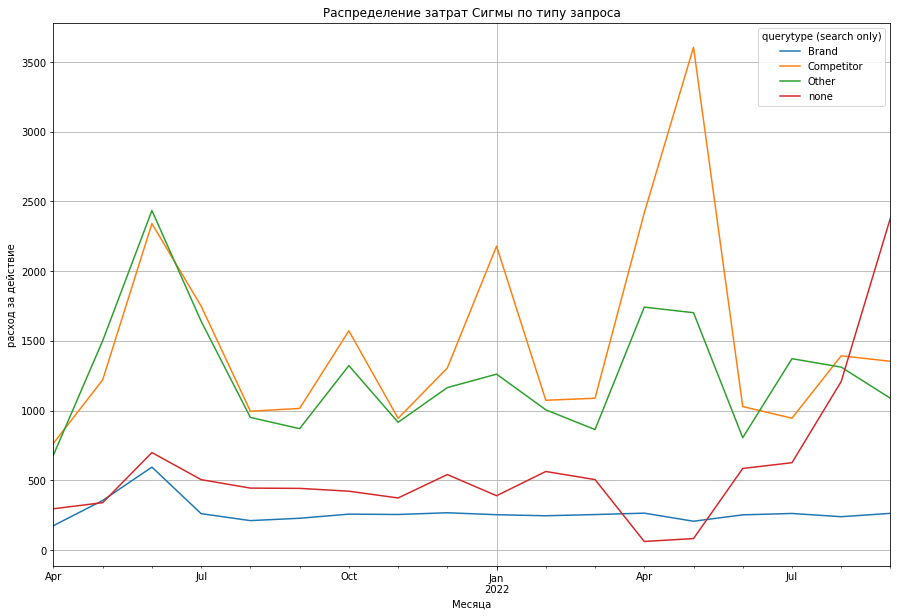

In [163]:
data_cpa_clients_querytype_sigma.plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='Распределение затрат Сигмы по типу запроса', grid=True)

plt.show()

Brand стабилен и в пределах до 600. С апреля посентябрь 2022г. 250р.

Competitor больше всего затрат. Диапазон цен от 1 000 до  3 500. Что тоже не является эффективной рекламой.

Other тоже много затрат. Диапазон цен от 600 до  2 500. Что тоже не является эффективной рекламой.

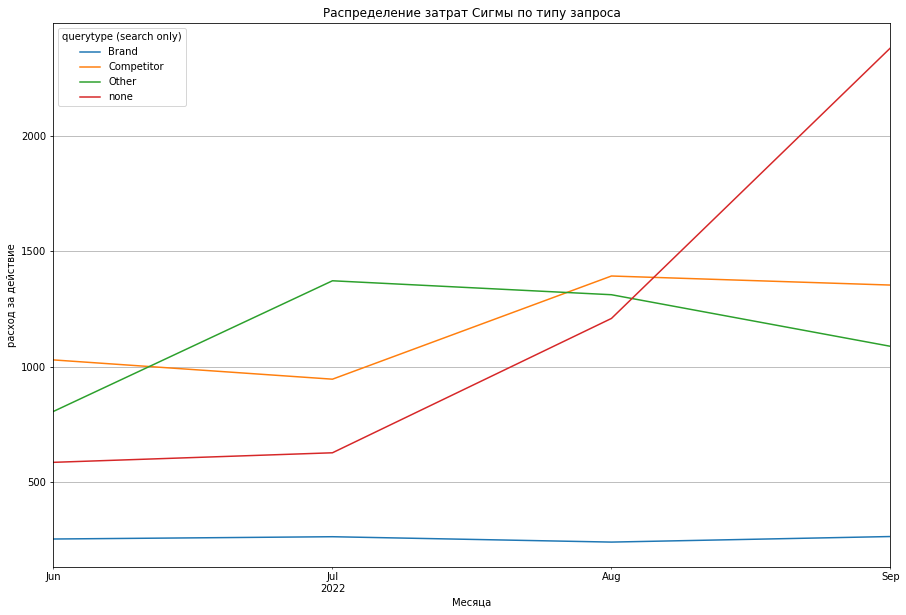

In [164]:
data_cpa_clients_querytype_sigma.tail(4).plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='Распределение затрат Сигмы по типу запроса', grid=True)

plt.show()

In [165]:
conclusion(data_cpa_clients_querytype_sigma)

Распределение затрат в пределах 380 рублей:
 * Brand - от 239.21 до 263.33

Распределение затрат более 380 рублей:
 * Competitor - от 945.61 до 1392.99
 * Other - от 805.85 до 1372.29
 * none - от 585.06 до 2382.06


### Распределение затрат Сигма по типу таргетинга

Подготовим данные по клиентам по месяцам, типу таргетинга, стоимости рекламы и целевых действий.

Посчитаем Стоимость за дествие показатель cpa, добавив новую колонку

In [166]:
cost_conversion_targetingtype = data.groupby(['client', 'targetingtype', 'month']).agg({'cost':sum, 'conversions':sum})
cost_conversion_targetingtype['cpa']=cost_conversion_targetingtype['cost']/cost_conversion_targetingtype['conversions']
cost_conversion_targetingtype

cost  conversions          cpa
client targetingtype month                                             
Альфа  Phrase        2021-04-01  1.347272e+07         2271  5932.507319
                     2021-05-01  1.365818e+07         6524  2093.528298
                     2021-06-01  1.586696e+07        10549  1504.119397
                     2021-07-01  1.334615e+07        10960  1217.714642
                     2021-08-01  1.592937e+07        12048  1322.158818
...                                       ...          ...          ...
Сигма  Retargeting   2022-05-01  5.741728e+04          109   526.764063
                     2022-06-01  1.088463e+06         1430   761.163171
                     2022-07-01  1.596847e+06         1215  1314.277204
                     2022-08-01  2.640967e+06          850  3107.020480
                     2022-09-01  1.297719e+06          444  2922.790177

[382 rows x 3 columns]

In [167]:
cost_conversion_targetingtype_sigma=cost_conversion_targetingtype.loc['Сигма']
cost_conversion_targetingtype_sigma

cost  conversions          cpa
targetingtype month                                             
Autotargeting 2022-05-01  1.680587e+04          165   101.853750
              2022-06-01  1.917680e+05          877   218.663629
              2022-07-01  1.165148e+05          405   287.690795
              2022-08-01  5.076900e+04          166   305.837321
              2022-09-01  1.354439e+05          395   342.896006
Phrase        2021-04-01  1.869818e+07        57251   326.600104
              2021-05-01  1.920980e+07        36161   531.229774
              2021-06-01  1.970471e+07        22698   868.125220
              2021-07-01  2.251735e+07        43690   515.389207
              2021-08-01  2.633382e+07        67204   391.848969
              2021-09-01  2.520230e+07        66074   381.425416
              2021-10-01  2.738312e+07        59102   463.319709
              2021-11-01  2.051010e+07        55422   370.071409
              2021-12-01  2.322613e+07        50445   460.424736
              2022-01-01  1.492889e+07        37201   401.303591
              2022-02-01  2.228920e+07        51215   435.208415
              2022-03-01  3.296030e+07        77731   424.030345
              2022-04-01  6.235946e+06        26015   239.705801
              2022-05-01  8.111981e+06        36223   223.945600
              2022-06-01  2.334854e+07        58807   397.036822
              2022-07-01  2.619527e+07        65745   398.437452
              2022-08-01  2.470169e+07        58263   423.968667
              2022-09-01  1.031343e+07        18487   557.874953
Retargeting   2021-04-01  1.001702e+05           30  3339.006272
              2021-05-01  5.186115e+04           33  1571.550074
              2021-06-01  5.895295e+04           14  4210.924932
              2021-07-01  2.997196e+05           54  5550.362759
              2021-08-01  4.614185e+05          187  2467.478750
              2021-09-01  3.381958e+05          199  1699.476147
              2021-10-01  4.493599e+05          433  1037.782711
              2021-11-01  1.781418e+06          292  6100.746734
              2021-12-01  1.123963e+06         1350   832.564939
              2022-01-01  1.936266e+05         1950    99.295677
              2022-02-01  4.341539e+05         3534   122.850568
              2022-03-01  1.720484e+06         2155   798.368609
              2022-04-01  0.000000e+00          122     0.000000
              2022-05-01  5.741728e+04          109   526.764063
              2022-06-01  1.088463e+06         1430   761.163171
              2022-07-01  1.596847e+06         1215  1314.277204
              2022-08-01  2.640967e+06          850  3107.020480
              2022-09-01  1.297719e+06          444  2922.790177

In [168]:
data_cpa_clients_targetingtype_sigma = pd.pivot_table(cost_conversion_targetingtype_sigma, values='cpa', index='month', columns='targetingtype', aggfunc='sum', fill_value=0, margins=False, dropna=False, margins_name='All', sort=True)
data_cpa_clients_targetingtype_sigma = round(data_cpa_clients_targetingtype_sigma, 2)

data_cpa_clients_targetingtype_sigma

targetingtype,Autotargeting,Phrase,Retargeting
month,,,
2021-04-01,0.00,326.60,3339.01
2021-05-01,0.00,531.23,1571.55
2021-06-01,0.00,868.13,4210.92
2021-07-01,0.00,515.39,5550.36
2021-08-01,0.00,391.85,2467.48
2021-09-01,0.00,381.43,1699.48
2021-10-01,0.00,463.32,1037.78
2021-11-01,0.00,370.07,6100.75
2021-12-01,0.00,460.42,832.56


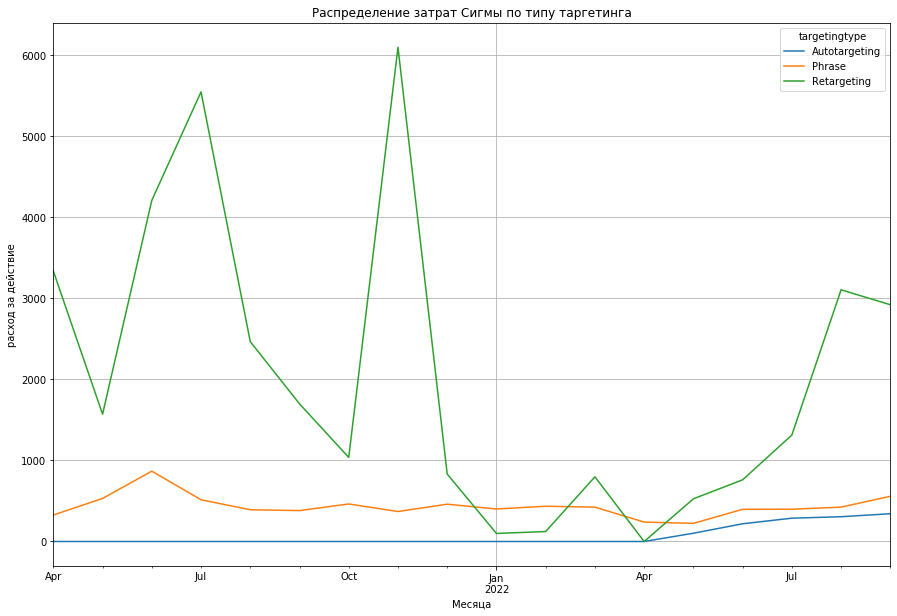

In [169]:
data_cpa_clients_targetingtype_sigma.plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='Распределение затрат Сигмы по типу таргетинга', grid=True)

plt.show()

Автотаргетинг более эффективный и стабильный с мая по сентябрь 2022г от 100 до 350.

Фразы тоже стабильные, новыходят подороже. С мая по сентябрь 2022г, мы видим подъем с 230 до 560.

Ретаргетинг самый нестабильный и не выгодный. Стоимость за клик варьируется от 100 до 6 000рублей.

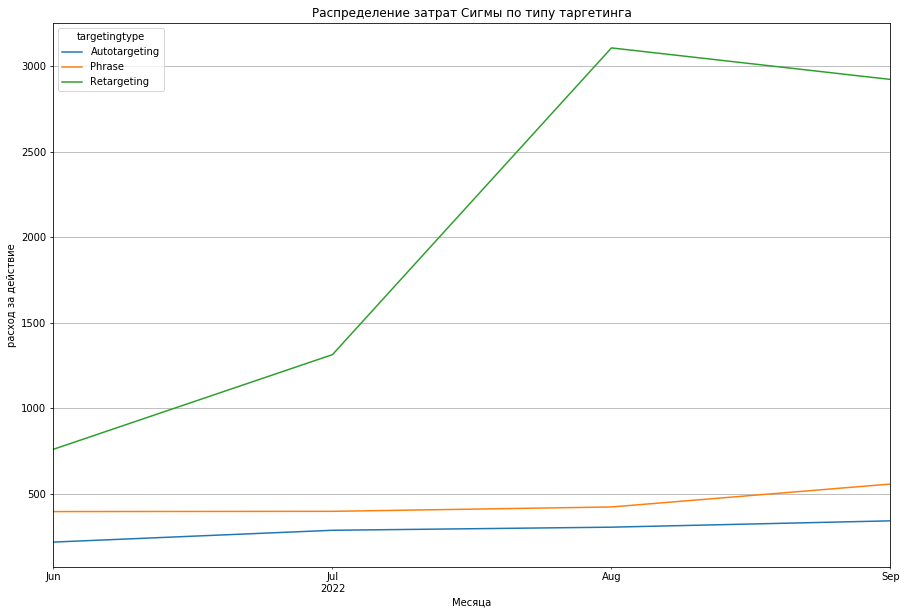

In [170]:
data_cpa_clients_targetingtype_sigma.tail(4).plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='Распределение затрат Сигмы по типу таргетинга', grid=True)

plt.show()

In [171]:
conclusion(data_cpa_clients_targetingtype_sigma)

Распределение затрат в пределах 380 рублей:
 * Autotargeting - от 218.66 до 342.9

Распределение затрат более 380 рублей:
 * Phrase - от 397.04 до 557.87
 * Retargeting - от 761.16 до 3107.02


### Многофакторное ранжирование cpa

In [172]:
data['cpa'] = data['cost']/ data['conversions']
data

,client,month,category,device,place,bannertype,querytype (search only),targetingtype,shows,clicks,cost,conversions,cpa
0,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Phrase,0,0,0.000000,0,NaN
1,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,5949,41,1666.844364,0,inf
2,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,cpc_video,none,Retargeting,191,6,40.641915,0,inf
3,Гамма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,227,1,45.747407,0,inf
4,Гамма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,18,0,0.000000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10473,Псилон,2022-09-01,ВКЛАДЫ,Desktop,Search,text,Brand,Phrase,1611,658,13302.665008,5,2660.533002
10474,Псилон,2022-09-01,ВКЛАДЫ,Desktop,Search,text,Other,Phrase,1,0,0.000000,0,NaN
10475,Псилон,2022-09-01,ВКЛАДЫ,Mobile,Search,text,Brand,Phrase,3536,1634,10213.208517,7,1459.029788
10476,Псилон,2022-09-01,ВКЛАДЫ,Mobile,Search,text,Other,Phrase,8,3,21.095415,0,inf


In [173]:
data_new = data[data['month'] >= '2022-06-01'].groupby(['client','category','device', 'place', 'bannertype','querytype (search only)', 'targetingtype']).agg({'cost':sum, 'conversions':sum})
data_new['cpa'] = data_new['cost'] / data_new['conversions'].apply(lambda x: max(x,1))
data_new = data_new.reset_index()

Найдем самые лучшие и худшие комбинации факторов по cpa для компании Сигма. 

In [174]:
data_sigma = data_new[(data_new['client'] == 'Сигма') & (data_new['cpa'] != 0) & ~((data_new['conversions'] == 0) & (data_new['cpa'] < 380))].sort_values('cpa', ascending = False)
data_sigma

,client,category,device,place,bannertype,querytype (search only),targetingtype,cost,conversions,cpa
775,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Phrase,3.279685e+05,2,163984.251547
770,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Other,Phrase,5.539323e+04,0,55393.233051
768,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Brand,Phrase,9.395233e+04,3,31317.443059
764,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Phrase,9.345621e+04,6,15576.035246
776,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,1.867355e+05,15,12449.034751
...,...,...,...,...,...,...,...,...,...,...
684,Сигма,ВКЛАДЫ,Mobile,Networks,text,none,Phrase,5.825341e+05,5861,99.391590
678,Сигма,ВКЛАДЫ,Desktop,Networks,text,none,Retargeting,9.104466e+04,943,96.547891
736,Сигма,КРЕДИТНЫЕ КАРТЫ,Mobile,Search,text,Brand,Phrase,1.388462e+06,14411,96.347369
677,Сигма,ВКЛАДЫ,Desktop,Networks,text,none,Phrase,5.725754e+05,7028,81.470608


Посмотрим, для каких категорий компания Сигма размещает баннеры

In [175]:
print('Сигма:', data[data['client'] == 'Сигма']['category'].unique())
print('Все', data['category'].unique())
set(data[data['client'] == 'Сигма']['category'].unique()).difference(set(data['category'].unique()))

Сигма: ['РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ' 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ'
 'КРЕДИТНЫЕ КАРТЫ' 'ИПОТЕЧНОЕ КРЕДИТОВАНИЕ' 'ИНВЕСТИЦИИ' 'ДЕБЕТОВЫЕ КАРТЫ'
 'ВКЛАДЫ']
Все ['РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ' 'ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ'
 'КРЕДИТНЫЕ КАРТЫ' 'ИПОТЕЧНОЕ КРЕДИТОВАНИЕ' 'ИНВЕСТИЦИИ' 'ДЕБЕТОВЫЕ КАРТЫ'
 'ВКЛАДЫ']


set()

Компания Сигма занимается всем категориями

Найдем самые лучшие и худшие комбинации факторов по cpa.

In [176]:
data_full = data[(data['month'] >= '2022-06-01') & (data['client'] != 'Сигма')].groupby(['category','device', 'place', 'bannertype','querytype (search only)', 'targetingtype']).agg({'cost':sum, 'conversions':sum})
data_full['cpa'] = data_full['cost'] / data_full['conversions'].apply(lambda x: max(x,1))
data_full = data_full.reset_index()

In [177]:
data_full[(data_full['cpa'] != 0) & ~((data_full['conversions'] == 0) & (data_full['cpa'] < 380))].sort_values('cpa', ascending = False)

,category,device,place,bannertype,querytype (search only),targetingtype,cost,conversions,cpa
6,ВКЛАДЫ,Desktop,Networks,text,none,Retargeting,4.807541e+05,4,120188.519644
186,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Autotargeting,2.075370e+05,2,103768.494903
18,ВКЛАДЫ,Mobile,Networks,text,none,Retargeting,8.904825e+05,9,98942.501345
17,ВКЛАДЫ,Mobile,Networks,text,none,Phrase,8.091255e+05,10,80912.551286
67,ИНВЕСТИЦИИ,Mobile,Search,text,Competitor,Phrase,7.129285e+04,0,71292.846585
...,...,...,...,...,...,...,...,...,...
142,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Search,text,Brand,Phrase,2.625588e+07,92550,283.693959
49,ДЕБЕТОВЫЕ КАРТЫ,Mobile,Search,text,Brand,Phrase,1.413838e+07,59753,236.613694
93,ИПОТЕЧНОЕ КРЕДИТОВАНИЕ,Mobile,Search,text,Brand,Phrase,7.494938e+06,36408,205.859638
160,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Mobile,Search,text,Brand,Phrase,3.611497e+07,185095,195.115871


In [178]:
data[data['cost'] != 0]['cost'].quantile()

78823.9143050847

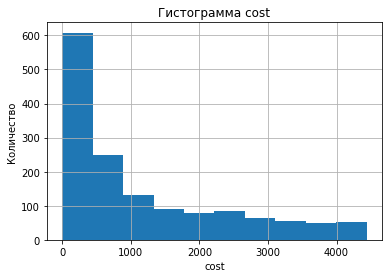

In [179]:

data[(data['cost'] < data[data['cost'] != 0]['cost'].quantile(q=0.2)) & (data['cost'] != 0)]['cost'].hist()
plt.title('Гистограмма cost')
plt.xlabel('cost')
plt.ylabel('Количество')
plt.show()

In [180]:
data[data['cost'] != 0]['cost'].quantile(q=0.10)

639.2607813559321

На основе этой гистограммы, можно взять границу cost < 640 (квантиль 10%), ниже которой считаем, что потрачено еще недастаточно денег, чтобы делать хорошие выводы об эффективности рекламы.

Сигма: хорошо, плохо
Все: хорошо, плохо

Рекомендуем убрать баннеры для следующих комбинаций: 
 1. Сигма плохо + Сигма cost >= 640
 2. (Сигма хорошо + Сигма cost < 640) or Сигма NaN + Все плохо

Рекомендуем покупать баннеры для следующих комбинаций(по приоритетности):
 1. Сигма хорошо + Все хорошо
 2. Сигма хорошо  + Сигма cost >= 640 + Все плохо or Все NaN
 3. (Сигма плохо + Сигма cost < 640) or Сигма NaN + Все хорошо

In [181]:
def mark(row):
    if row['cpa'] <= 380:
        return 'good'
    return 'bad'

In [182]:
data_sigma['marker'] = data_sigma.apply(mark, axis = 1)
data_full['marker'] = data_full.apply(mark, axis = 1)

In [183]:
data_sigma

,client,category,device,place,bannertype,querytype (search only),targetingtype,cost,conversions,cpa,marker
775,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Phrase,3.279685e+05,2,163984.251547,bad
770,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Other,Phrase,5.539323e+04,0,55393.233051,bad
768,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Brand,Phrase,9.395233e+04,3,31317.443059,bad
764,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Phrase,9.345621e+04,6,15576.035246,bad
776,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,1.867355e+05,15,12449.034751,bad
...,...,...,...,...,...,...,...,...,...,...,...
684,Сигма,ВКЛАДЫ,Mobile,Networks,text,none,Phrase,5.825341e+05,5861,99.391590,good
678,Сигма,ВКЛАДЫ,Desktop,Networks,text,none,Retargeting,9.104466e+04,943,96.547891,good
736,Сигма,КРЕДИТНЫЕ КАРТЫ,Mobile,Search,text,Brand,Phrase,1.388462e+06,14411,96.347369,good
677,Сигма,ВКЛАДЫ,Desktop,Networks,text,none,Phrase,5.725754e+05,7028,81.470608,good


In [184]:
data_sigma.columns

Index(['client', 'category', 'device', 'place', 'bannertype',
       'querytype (search only)', 'targetingtype', 'cost', 'conversions',
       'cpa', 'marker'],
      dtype='object')

In [185]:
data_joined = data_sigma.merge(data_full, on = ['category','device', 'place', 'bannertype',
       'querytype (search only)', 'targetingtype'], how = 'outer',suffixes=('_sigma', '_all'))
data_joined

,client,category,device,place,bannertype,querytype (search only),targetingtype,cost_sigma,conversions_sigma,cpa_sigma,marker_sigma,cost_all,conversions_all,cpa_all,marker_all
0,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Phrase,327968.503093,2.0,163984.251547,bad,66154.479966,4.0,16538.619992,bad
1,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Other,Phrase,55393.233051,0.0,55393.233051,bad,220120.743915,139.0,1583.602474,bad
2,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Brand,Phrase,93952.329178,3.0,31317.443059,bad,94453.308076,34.0,2778.038473,bad
3,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Phrase,93456.211475,6.0,15576.035246,bad,2320.364644,0.0,2320.364644,bad
4,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,186735.521263,15.0,12449.034751,bad,89150.908424,13.0,6857.762186,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,NaN,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Search,mcbanner,Brand,Phrase,NaN,NaN,NaN,NaN,428.216797,0.0,428.216797,bad
198,NaN,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Search,mcbanner,Other,Phrase,NaN,NaN,NaN,NaN,2756.412686,1.0,2756.412686,bad
199,NaN,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Search,text,Brand,Autotargeting,NaN,NaN,NaN,NaN,1060.784263,0.0,1060.784263,bad
200,NaN,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Search,text,Competitor,Autotargeting,NaN,NaN,NaN,NaN,3035.983347,0.0,3035.983347,bad


In [186]:
list(map(type,data_joined['marker_sigma'].unique()))

[str, str, float]

In [187]:
def verdict(row):
    if row['marker_sigma'] == 'bad' and row['cost_sigma'] >= 640:
        return -1
    elif (row['marker_sigma'] == 'good' and row['cost_sigma'] < 640 or pd.notnull(row['marker_sigma'])) and row['marker_all'] == 'bad':
        return -2
    
    elif row['marker_sigma'] == 'good' and row['marker_all'] == 'good':
        return 1
    elif row['marker_sigma'] == 'good' and row['cost_sigma'] >= 640 and (row['marker_all'] == 'bad' or pd.notnull(row['marker_all'])):
        return 2
    elif (row['marker_sigma'] == 'bad' and row['cost_sigma'] < 640 or pd.notnull(row['marker_sigma'])) and row['marker_all'] == 'good':
        return 3
    return 0

In [188]:
data_joined['verdict'] = data_joined.apply(verdict, axis = 1)
data_joined

,client,category,device,place,bannertype,querytype (search only),targetingtype,cost_sigma,conversions_sigma,cpa_sigma,marker_sigma,cost_all,conversions_all,cpa_all,marker_all,verdict
0,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Phrase,327968.503093,2.0,163984.251547,bad,66154.479966,4.0,16538.619992,bad,-1
1,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Other,Phrase,55393.233051,0.0,55393.233051,bad,220120.743915,139.0,1583.602474,bad,-1
2,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Brand,Phrase,93952.329178,3.0,31317.443059,bad,94453.308076,34.0,2778.038473,bad,-1
3,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Phrase,93456.211475,6.0,15576.035246,bad,2320.364644,0.0,2320.364644,bad,-1
4,Сигма,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,186735.521263,15.0,12449.034751,bad,89150.908424,13.0,6857.762186,bad,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,NaN,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Search,mcbanner,Brand,Phrase,NaN,NaN,NaN,NaN,428.216797,0.0,428.216797,bad,0
198,NaN,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Search,mcbanner,Other,Phrase,NaN,NaN,NaN,NaN,2756.412686,1.0,2756.412686,bad,0
199,NaN,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Search,text,Brand,Autotargeting,NaN,NaN,NaN,NaN,1060.784263,0.0,1060.784263,bad,0
200,NaN,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Search,text,Competitor,Autotargeting,NaN,NaN,NaN,NaN,3035.983347,0.0,3035.983347,bad,0


In [189]:
data_joined.verdict.value_counts()

 0    127
-1     45
-2     20
 1     10
Name: verdict, dtype: int64

In [190]:
def conclusion_combinations(data):
    
    print('Желательно не использовать следующие комбинации:')

    data_bad = data[data['verdict'] < 0].sort_values(['verdict','cpa_all'], ascending = False).reset_index(drop=True).head(10)
    for i,row in data_bad.iterrows():  
        print(f'{i+1}.')
        for index, value in row.items():
            if index in ['category', 'device', 'place', 'bannertype',
                           'querytype (search only)', 'targetingtype']:
                print(f" {index} : {value}")
    print()
    print('Желательно использовать следующие комбинации:')

    data_bad = data[data['verdict'] > 0].sort_values(['verdict','cpa_all'], ascending = False).reset_index(drop=True).head(10)
    for i,row in data_bad.iterrows():  
        print(f'{i+1}.')
        for index, value in row.items():
            if index in ['category', 'device', 'place', 'bannertype',
                           'querytype (search only)', 'targetingtype']:
                print(f" {index} : {value}")
    print()

In [191]:
conclusion_combinations(data_joined)

Желательно не использовать следующие комбинации:
1.
 category : РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ
 device : Desktop
 place : Networks
 bannertype : text
 querytype (search only) : none
 targetingtype : Phrase
2.
 category : РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ
 device : Mobile
 place : Networks
 bannertype : image_ad
 querytype (search only) : none
 targetingtype : Phrase
3.
 category : РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ
 device : Desktop
 place : Search
 bannertype : text
 querytype (search only) : Competitor
 targetingtype : Phrase
4.
 category : РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ
 device : Mobile
 place : Networks
 bannertype : text
 querytype (search only) : none
 targetingtype : Phrase
5.
 category : РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ
 device : Mobile
 place : Search
 bannertype : text
 querytype (search only) : Competitor
 targetingtype : Phrase
6.
 category : РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ
 device : Desktop
 place : Search
 bannertype : mcbanner
 querytype (search only) : Competitor
 targetingtype :

Посчитаем, как измменится cpa, если бы в прошлом мы принменили свои рекомендации.

In [192]:
data_good = data.merge(data_joined[data_joined['verdict'] >= 0].drop(columns = ['client']), on = ['category','device', 'place', 'bannertype',
       'querytype (search only)', 'targetingtype'], how = 'inner')

In [193]:
good_conversion = data_good.groupby(['client', 'month']).agg({'cost':sum, 'conversions':sum}).loc['Сигма']
good_conversion['cpa']=good_conversion['cost']/good_conversion['conversions']
good_conversion

,cost,conversions,cpa
month,,,
2021-04-01,3.889485e+06,22462,173.158425
2021-05-01,4.345967e+06,12858,337.997090
2021-06-01,3.580088e+06,5503,650.570208
2021-07-01,3.966308e+06,18144,218.601617
2021-08-01,5.263049e+06,29090,180.922969
2021-09-01,5.721623e+06,30078,190.226184
2021-10-01,4.390508e+06,23213,189.140069
2021-11-01,2.570350e+06,15258,168.459190
2021-12-01,4.315706e+06,23931,180.339557


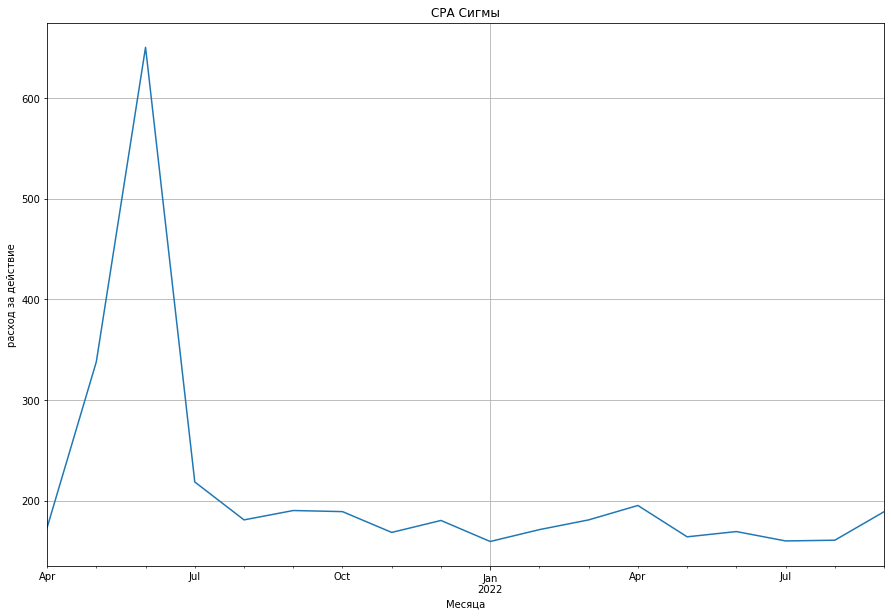

In [194]:
good_conversion['cpa'].plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='СРА Сигмы', grid=True)
plt.show()

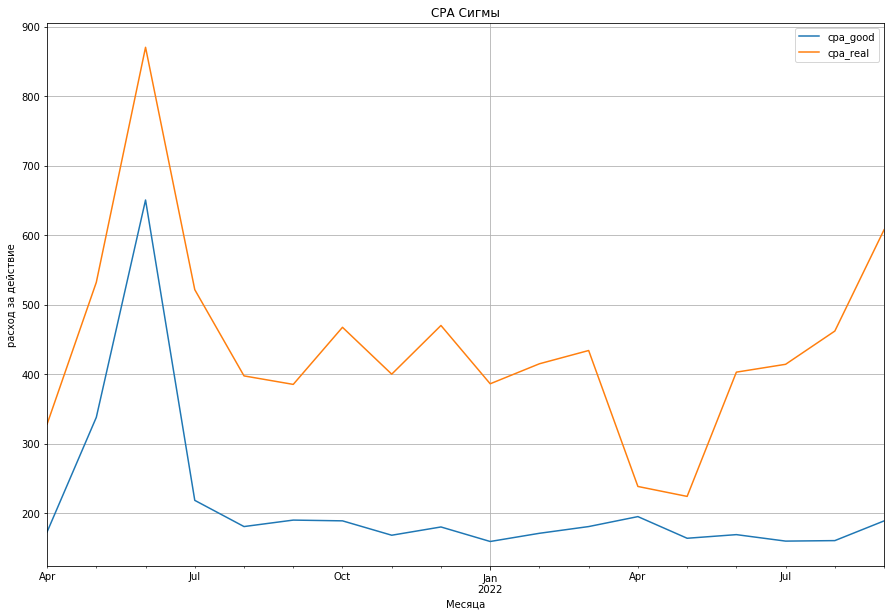

In [195]:
pd.merge(left = good_conversion['cpa'], right = cost_conversion_sigma['cpa'],  left_index=True, right_index=True, suffixes = ('_good', '_real')).plot(figsize = (15, 10), xlabel='Месяца', ylabel='расход за действие', title='СРА Сигмы', grid=True)
plt.show()


In [86]:
good_conversion['cpa'].mean()

213.30312973299735

Удалив плохие группы баннеров, получили средний cpa на уровне 213.

## Общий вывод.

In [87]:
print('Распределение затрат с июня по сентябрь 2022')
print()
print()
print()
print('\t По категориям')
print()
conclusion(data_cpa_clients_category_sigma)
print()
print()
print('\t По девайсам')
print()
conclusion(data_cpa_clients_device_sigma)
print()
print()
print('\t По месту')
print()
conclusion(data_cpa_clients_place_sigma)
print()
print()
print('\t По типу баннера')
print()
conclusion(data_cpa_clients_bannertype_sigma)
print()
print()
print('\t По типу запроса (только для поиска)')
print()
conclusion(data_cpa_clients_querytype_sigma)
print()
print()
print('\t По типу типу таргетинга')
print()
conclusion(data_cpa_clients_targetingtype_sigma)

Распределение затрат с июня по сентябрь 2022



	 По категориям

Распределение затрат в пределах 380 рублей:
 * ВКЛАДЫ - от 68.17 до 202.4
 * ДЕБЕТОВЫЕ КАРТЫ - от 202.85 до 355.91
 * КРЕДИТНЫЕ КАРТЫ - от 154.47 до 239.97
 * ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ - от 178.59 до 304.34

Распределение затрат более 380 рублей:
 * ИПОТЕЧНОЕ КРЕДИТОВАНИЕ - от 411.2 до 575.52
 * РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ - от 3738.71 до 10095.14


	 По девайсам

Распределение затрат в пределах 380 рублей:
Нет

Распределение затрат более 380 рублей:
 * Desktop - от 497.34 до 681.65
 * Mobile - от 352.98 до 564.58


	 По месту

Распределение затрат в пределах 380 рублей:
 * Search - от 315.61 до 360.42

Распределение затрат более 380 рублей:
 * Networks - от 585.06 до 2382.06


	 По типу баннера

Распределение затрат в пределах 380 рублей:
Нет

Распределение затрат более 380 рублей:
 * image_ad - от 8429.88 до 79067.87
 * mcbanner - от 0.0 до 42446.06
 * text - от 401.89 до 598.55


	 По типу запроса (только для пои

In [88]:
conclusion_combinations(data_joined)

Желательно не использовать следующие комбинации:
1.
 category : РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ
 device : Desktop
 place : Networks
 bannertype : text
 querytype (search only) : none
 targetingtype : Phrase
2.
 category : РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ
 device : Mobile
 place : Networks
 bannertype : image_ad
 querytype (search only) : none
 targetingtype : Phrase
3.
 category : РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ
 device : Desktop
 place : Search
 bannertype : text
 querytype (search only) : Competitor
 targetingtype : Phrase
4.
 category : РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ
 device : Mobile
 place : Networks
 bannertype : text
 querytype (search only) : none
 targetingtype : Phrase
5.
 category : РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ
 device : Mobile
 place : Search
 bannertype : text
 querytype (search only) : Competitor
 targetingtype : Phrase
6.
 category : РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ
 device : Desktop
 place : Search
 bannertype : mcbanner
 querytype (search only) : Competitor
 targetingtype :

    
Таким образом проблемные участки, их желательно исключить :

     категории:
     
     * расчетно-кассовое обслуживание
     * ипотечное кредитование
     
     места:
     
     * Networks
     
     типу запроса (только для поиска):
     
     
     * Competitor
     * Other
     
     типу таргетинга: 
     
     * Phrase
     * Retargeting
     
     
     
Положительно скажется на рекламе и расходы сократятся до 380:

     категории:
     
     * вклады 
     * дебетовые карты 
     * кредитные карты 
     * потребитльское кредитование
     
     места:
     
     * Search
     
     типу запроса (только для поиска):
       
     * Brand

     тип баннера:
     
     *текст
     
     типу таргетинга: 
     
     * Autotargeting
     
     Девайсы:
     
     * не имеет значение